<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Predicting Dengue Cases in Singapore

---
## Part 3(B): Modelling, Insights & Applications
---

## Contents
---
- [Overview of Approach](##Overview-of-Approach)
- [Details & Considerations](##Details-&-Considerations)
- [Evaluation](##Evaluation)
- [Limitations, Suggestions & Applications](##Limitations,-Suggestions-&-Applications)
- [Appendix](##Appendix)

---
## Overview of Approach
---

Dengue is affected by numerous factors beyond that of weather, which is the primary dataset we have for this project. By nature, weather variables themselves are complex and prone to fluctuations. In addition, they often exert influence on one another and are best **not** analysed on their own, because conclusions drawn from such analyses will surely be inadequate.

Aside from the changeable weather, dengue is often affected by factors mentioned earlier during the EDA, such as vector control measures (VCM), one-off events, population statistics, etc. These factors are _themselves_ made up of many other different factors. Case in point, VCM cannot be evaluated just based on their presence or absence. Which week did the VCM commence? Was the commencement prior to after the outbreak, and how many weeks before or after? How aggressive were the VCM? Were they different from previous years? For how long were they carried out? ...These are just a few aspects to consider of many, and this is simply for a single factor, significant though it may be.

From the above arise two problems:
1) Difficulty in quantifying impact of weather as well as determining a lag time that would be suitable for _every_ iteration of a model;
2) Lack of information - most statistics are unavailable, apart from weather.

We tried our best to fit a model despite the above limitations, as can be seen from the previous notebook. In the appendix below, you will find a model that we tried out as well, though there were a few issues with it. That said, these models are not the focus of this notebook.

In this segment, we analysed the **pattern of dengue cases themselves** and came up with a set of predictions solely based on these patterns. It is the simplest model that does not use any external libraries, and can therefore be easily understood and tweaked when needed, for example, when additional information is available.

---
## Details & Considerations
---

### Details

<img src='https://i.imgur.com/v38Ofvc.png'>

There are 52 lines in the image above - 1 for each of the 52 weeks in any given year. Essentially, the image is showing the year-on-year change in dengue cases by _week_. 

Instead of focusing on each individual line, focus on the entire image instead - an obvious pattern can be seen at once. Unlike weather variables with unclear patterns across years and weeks, the pattern for dengue cases is actually a lot clearer. Specifically, this observation can be made:

> For any given set of 2 years, most weeks 'move' in the same direction. That is to say, for a given set of years $X$ & $Y$, if there are more cases in Year $X$ than Year $Y$, the 'movement' of cases, week-on-week, will most likely be downwards, ie., a reduction in dengue cases will be observed.

A good example of the above is weekly cases from 2012 to 2013 as shown below:

<img src='https://i.imgur.com/TBbFqbF.png'>

There was a general increase in cases from 2012 to 2013. In addition, based on the above, we can see that this increase is reflected across most, if not all, of the 52 weeks.

This pattern is important because it means that it may potentially be possible to forecast dengue cases just based on dengue cases, without the need for any external libraries, thus granting the user more control and a better degree of understanding due to the explicit nature of the forecasting.

### Considerations

As with every other method, this method will have its drawbacks as well. To be able to create a set of predictions based on the above, it is necessary to do everything from scratch and take into account certain important considerations.

#### _Does the above pattern always hold true?_

Based on our dataset (2012 to 2021 to predict 2022), that is not the case. Specifically, it may be difficult to utilise this approach when the current and previous years are **similar**. This is especially the case when both years have a low number of cases, because, logically, one would expect fluctuations to occur frequently when numbers are small. Here is one such example (2017 to 2018):

<img src='https://i.imgur.com/g17godb.png'>

Notice that the numbers on the y-axis are exceptionally small - this is because both years were very 'calm'. The danger in such cases is wrongly predicting that the coming year's cases will be high, when that is actually not the case. While this is a 'conservative' approach that assumes things to be worse than they are, it could be a costly approach due to, for example, adopting aggressive VCM when there is no need to. 

Another example, this time with both years (2013 & 2014) having relatively high numbers, is shown below:

<img src='https://i.imgur.com/ndkqcSp.png'>

This is indeed vexing, and could be a challenge to predict regardless of the model being utilised.

#### _What can we do to reduce the issues highlighted above?_

After taking the above into consideration, we have decided to implement the following measures:

**Aim for a reasonable forecast horizon of 7 weeks**

To avoid generating unrealistic predictions that get increasingly 'out-of-hand', it would be more prudent to shorten the forecast horizon and increase model accuracy since the chief objective here is to generate useable predictions.

**Generate predictions on the week-on-week percentage change, rather than actual dengue cases**

The exact mathematical calculations can be found below, but we will provide the gist behind them here.

To be able to generate predictions, certain steps must be taken. While the process being adopted here is rather straightforward, it is not simple to the extent to calculating, for example, the mean of the past $x$ weeks. To be able to generate predictions with at least a certain level of reliability, there is a need to do some (legitimate) data transformation so as to be able to better understand the underlying mechanisms of how the data points move, relative to one another.


### Process of Generating Predictions

Step one of what we just mentioned above involves looking beyond the dengue cases themselves. Therefore, rather than predicting the cases themselves, we decided to predict the week-on-week _percentage change_ instead, before doing simple calculations to generate the predicted numbers of dengue cases based on the percentage changes.

In other words, we went from this:

<img src='https://i.imgur.com/KtHacp2.png'>

...to this:

<img src='https://i.imgur.com/UcrLPc4.png'>

It's still not quite good enough, because it just looks like an inverse of the dengue cases, which makes sense since it's a graph of percentage change. Next, we apply a moving average window of 7 to 'smoothen' it, in hopes of being able to understand the general trend better:

<img src='https://i.imgur.com/iYnKemU.png'>

This is somewhat better, though still difficult to predict, because there are still some very obvious cycles that would be quite impossible to accurately predict.

Therefore, we will calculate the different between every row and its previous row, then plot it again:

<img src='https://i.imgur.com/tGputI3.png'>

This is definitely getting closer to what we want, but not quite. We do the above one more time:

<img src='https://i.imgur.com/bSSdSNL.png'>

...and finally arrive at this, which will be sufficient for our purposes. It looks random, ie., like _white noise_, which is what we were aiming for. It is still risky to do long-term predictions based on this, which is why we will restrict the forecast horizon to 7 weeks.

Based on this final graph, we will finally arrive at our first value, which will in turn generate all of the other values. It is a very simple step that involves a weighted average of the most recent 3 values. We will very quickly approach the mean, which means that we cannot use this method indefinitely (therefore the forecast horizon of 7 weeks).

The beauty (and risk) of obtaining the value of this step is that, when we generate the rest of the values (ie., the other values shown in the other graphs above), the values are not 'predictable', ie., we will not encounter the issue of all predicted values being essentially the same, as we may in some other models. The reason behind this is the _depth_ being used here, where the actual predicted value is several 'layers' deep. However, just as every coin has two sides, the flip (down) side of this approach is that values can get rather out of hand, which, once again, is why we restrict the forecast horizon to 7 weeks so as to err on the side of caution.

**Are all values possible?**

Negative values can result from the model, which we then amend to 0. It is a simple approach, and potentially a sign of inaccurate predictions, which in turn serves as a sort of 'warning' to the user generating and evaluating the predicted values.

The tougher side to this is values that run wildly high or low _despite_ the modest forecast horizon. To deal with this, some form of arbitrary estimation will be needed, but it will be based on actual values, specifically, the concepts of **minimum values, maximum values, and standard deviation**.

For each of the 52 weeks, the mean, median, minimum, maximum, and standard deviation of _percentage change_ will be calculated. Of these, we are most interested in the last 3. (Do note that values are subject to changes, because the data window shifts along with the prediction horizon.)

For each generated prediction of week-on-week percentage change, we will compare it to the historical minimum, maximum, and standard deviation. After the unfortunate experience of 2020, we now know that extremely high values are, in fact, possible. In other words, huge week-on-week percentage changes are not impossible. To accommodate this, yet not allow the values to run _too_ wild (it is extremely unlikely, in _this_ country, that weekly case numbers from a disease we are used to can get dangerously out of hand), we have applied the following:
> The predicted value will be compared to the historical minimum, maximum, and standard deviation.

> If the predicted value exceeds $max*(SD*0.25)$, it will be set to the latter;

> If the predicted value goes below $min*(SD*0.25)$, it will be set to the latter.

The value of 0.25 is admittedly arbitrary, and can therefore be amended based on existing domain / espert knowledge. For example, if, for some reason, it is plausible that the coming year could be a worse year than, say, 2020, _and_ the current year has been very smooth-sailing, then the user may wish to adjust the value upwards.

### Final Thoughts

The entire process can be viewed below alongisde the generated predictions, and as no external libraries are being used, everything is transparent. It is easily interpertable and editable, which could potentially make it easier for end users.

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd

import math

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
# Function that rearranges the data such that columns and rows are years and weeks respectively.

def get_data_across_years(df=None, col=None):
    
    '''   
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be used in function.
    col : str
        Column of DataFrame to extract data from.
    '''
    
    # Create a new dataframe with each year being a column and each row being a week.
    df_new = pd.DataFrame(columns=range(2012,2023), index=range(1,53))
    
    # Include additional columns for year and week.
    df['year'] = df.index.map(lambda x: int(x[:4]))
    df['week'] = df.index.map(lambda x: int(x[-2:]))
    
    # For each year...
    for year in range(2012,2023):
        
        # ...and for each week...
        for i in range(1,53):
            
            # Extract the data and insert it into the new dataframe.
            df_new.loc[i, year] = df.loc[df.apply(lambda x: (x['year']==year) & (x['week']==i), axis=1), col][0]
            
    return df_new

In [3]:
# Function that shows the year-on-year change, by week, for dengue cases.

def plot_yoy_change(
    df=None, 
    year_start=None, 
    year_end=None, 
    marker=None, 
    figsize=None, 
    legend=None, 
    define_xticks=False, 
    xticks=None
):
    
    '''   
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be used in function.
    year_start : int
        Year to start slicing the DataFrame from.
    year_end : int
        Year to stop slicing the DataFrame from.
    marker : str or None
        if specified, will be the marker used for the resulting line graph.
        Should be None or 'o'.
    figsize : tup
        Tuple with 2 arguments. Determines the figure size of the resulting line graph.
    legend : list or None
        If specified, elements will be used as the legend.
    define_xticks : bool
        Determines whether or not xticks should be user-defined.
    xticks : list
        List of xticks to be used for the x-axis.
        Will only take effect if define_xticks is set to be True.
    '''
    
    # Plot a line graph for the specified range of years.
    df.loc[year_start:year_end, :].plot.line(
        marker=marker,
        figsize=figsize,
        legend=legend
    )
    
    # If define_xticks is set to be True, x-axis will use values from the xticks parameter.
    if not define_xticks:
        plt.xticks([year_start,year_end])
        
    else:
        plt.xticks(xticks)
        
    # Set the x-axis label, y-axis label and chart title.
    plt.xlabel('Year')
    plt.ylabel('Dengue Cases')
    plt.title(f'Year-on-Year Change in Dengue Cases by Week: {year_start} to {year_end}')
    
    plt.show();

In [4]:
# Function that calculates the percentage change in values across two dataframes.

def get_percentage_change(df=None, current_year=None, week_start=None, week_end=None):
    
    '''   
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be used in function.
    current_year : int
        Year to stop slicing the DataFrame from.
    week_start : int
        First week to obtain data from.
    week_end : int
        Final week to obtain data from.
    '''
    
    # Create two dataframes, one for the specified year and another for its preceding year.
    df_prev = df.loc[current_year-1, week_start:week_end].transpose()
    df_current = df.loc[current_year, week_start:week_end].transpose()
    
    # Calculate the percentage change for each row of values from the dataframes.
    percentage_change = ((df_current - df_prev) / df_prev) * 100
    
    # Create a dataframe based on the values obtained above.
    df_pchange = pd.DataFrame(percentage_change, columns=[f'percentage_change_{current_year}'])
    
    # Ensure that the resulting values are of the correct type (float).
    df_pchange[f'percentage_change_{current_year}'] = df_pchange[f'percentage_change_{current_year}'].astype(float)
    
    return df_pchange

In [5]:
# Function that generates mean, median, standard deviation, max and min values.
# Should be applied to the the dataframe created after applying the get_percentage_change() function.

def get_pchange_metrics(df=None, week_start=None):
    
    '''   
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be used in function.
    week_start : int
        First week to obtain data from.
        Should be 1 less than the actual starting week.
        For example, to generate predictions from week 1 onwards, use week_start=0.
    '''

    # Create an empty dataframe to store the information.
    df_pchange_metrics = pd.DataFrame(index=range(1,53))
    
    # Caculate each metric based on the desired date range, which changes when the forecast horizon is changed.
    df_pchange_metrics['mean'] = [
        df.loc[i, f'percentage_change_2013':'percentage_change_2022'].mean() \
        if i not in range(1,week_start+1) \
        else df.loc[i, 'percentage_change_2012':'percentage_change_2021'].mean() \
        for i in range(1,53)]
    
    df_pchange_metrics['median'] = [
        df.loc[i, f'percentage_change_2013':'percentage_change_2022'].median() \
        if i not in range(1,week_start+1) \
        else df.loc[i, 'percentage_change_2012':'percentage_change_2021'].median() \
        for i in range(1,53)]
    
    df_pchange_metrics['std_dev'] = [
        df.loc[i, f'percentage_change_2013':'percentage_change_2022'].std() \
        if i not in range(1,week_start+1) \
        else df.loc[i, 'percentage_change_2012':'percentage_change_2021'].std() \
        for i in range(1,53)]
    
    df_pchange_metrics['max'] = [
        df.loc[i, f'percentage_change_2013':'percentage_change_2022'].max() \
        if i not in range(1,week_start+1) \
        else df.loc[i, 'percentage_change_2012':'percentage_change_2021'].max() \
        for i in range(1,53)]
    
    df_pchange_metrics['min'] = [
        df.loc[i, f'percentage_change_2013':'percentage_change_2022'].min() \
        if i not in range(1,week_start+1) \
        else df.loc[i, 'percentage_change_2012':'percentage_change_2021'].min() \
        for i in range(1,53)]

    return df_pchange_metrics

In [6]:
# Function that plots 2 lines on the same graph for comparison purposes.
# Specifically, the lines should be for the original vs moving average window.

def plot_actual_vs_ma(df=None, col=None, params=None, ma_window=None):
    
    '''   
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be used in function.
    col : str
        Column of DataFrame to extract data from.
    params : dict
        Dictionary of parameters to unpack when using pd.DataFrame.plot.line().
    ma_window : int
        Value that corresponds to the moving average window size.
    '''
    
    # Plot 2 line graphs (original values & new values obtained from applying the MA window) with the specified parameters.
    df[col].plot.line(**params)
    df[col].rolling(ma_window).mean().shift(-(ma_window-1)//2).plot.line(**params)
    
    # Set the xticks, x-axis label, y-axis label, legend and chart title.
    plt.title(f'Percentage Change ({col[-4:]}): Actual vs. Moving Average Window of {ma_window}')
    plt.xticks([i for i in range(1,53,4)])
    plt.xlabel('Week')
    plt.ylabel('%')
    plt.legend([f'Actual','MA Window of {year}'])
    
    plt.show();

In [7]:
# Function to create a dataframe that includes:
# 1) percentage changes;
# 2) percentage changes after application of MA window;
# 3) row-to-row change in values from (2);
# 4) row-to-row change in values from (3).

def create_df_ma(df=None, n_weeks_to_drop=None, ma=None):
    
    '''   
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be used in function.
    n_weeks_to_drop : int
        Rows to drop from the end of the DataFrame.
    ma : int
        Value that corresponds to the moving average window size.
    '''

    # Create an empty dataframe to store the values.
    df_ma = pd.DataFrame()

    # Add values to the dataframe.
    for year in range(2013,2023):
        df_ma = pd.concat([df_ma, df[f'percentage_change_{year}']])

    # Rename the columns and reset the index for the purposes of standardisation.
    df_ma = df_ma.rename(columns={0: 'original'})
    df_ma = df_ma.reset_index().drop('index', axis=1)
    
    # Create a column to reflect the MA window based on the specified ma size.
    df_ma['moving_average'] = df_ma.original.rolling(ma).mean()
    
    # Create a column to calculate the difference in values from the...
    # ...previous and current row of the 'moving_average' column.
    df_ma['change_from_prev_ma'] = df_ma.moving_average - df_ma.moving_average.shift(1)
    
    # Create a column to calculate the difference in values from the...
    # ...previous and current row of the 'change_from_prev_ma' column.
    df_ma['change_of_change'] = df_ma.change_from_prev_ma - df_ma.change_from_prev_ma.shift(1)
    
    # Retain only the relevant rows.
    df_ma = df_ma.iloc[:-n_weeks_to_drop, :]
    
    return df_ma

In [8]:
# Function to obtain the number of 'sign changes' from the previous to current row of a dataframe.

def get_sign_change(df=None, col=None):
    
    '''   
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be used in function.
    col : str
        Column of DataFrame to extract data from.
    '''

    # Create an empty list to store the indexes of the rows with sign changes.
    sign_change_pos = []

    # Create a variable to store the previous row's value.
    prev = df.iloc[1, 1]

    # For each row in the dataframe...
    for idx, row in df.iterrows():

        try:

            # ...if there is a sign change, append the index number to the list above.
            if (prev < 0 and row[col] > 0) or (prev > 0 and row[col] < 0):

                sign_change_pos.append(idx)

        except:

            pass

        # Update the variable with the current row's value to be used for the next row.
        prev = df.at[idx, col]
        
    return sign_change_pos

In [9]:
# Class that generates predicted values of dengue cases.

class Predict():
    
    # Initiate parameters and run the class functions.
    def __init__(
        self, 
        df=None, 
        year=None, 
        pred_weeks=None, 
        df_saveto=None, 
        start_loc=None, 
        prev_year=None, 
        df_pchange=None
    ):
        
        self.df = df.copy(deep=True)
        self.year = year
        self.pred_weeks = pred_weeks
        self.df_saveto = df_saveto.copy(deep=True)
        self.start_loc = start_loc
        self.prev_year = prev_year
        self.df_pchange = df_pchange
        
        self.predict()
        self.check_and_amend_preds()
        self.get_preds()
        self.evaluate()
    
    
    # Function that generates predictions of the percentage changes.
    def predict(self):

        # Slice the dataframe such that only the last 7 rows, which will be used for predicting the next 7 weeks, are used.
        self.df_data = self.df.loc[(self.year-year_1)*52+(52-7+self.start_loc-1):]
        
        # Reset the index and remove the additional resulting column.
        self.df_data = self.df_data.reset_index().drop('index', axis=1)
        
        # Include an additional 7 rows to store the predictions.
        self.df_data = pd.concat([self.df_data, pd.DataFrame(index=range(7,14))])

        # For each week to predict...
        for i in self.pred_weeks:
            
            # First, calculate the 'change_of_change' column by getting a weighted average of the last 3 values.
            self.df_data.iloc[i, -1] = (3/6*self.df_data.iloc[i-1, -1]) + \
            (2/6*self.df_data.iloc[i-2, -1]) + \
            (1/6*self.df_data.iloc[i-3, -1])
            
            # Then, update the remaining columns based on the value obtained above.
            self.df_data.iloc[i, -2] = self.df_data.iloc[i-1, -2] + self.df_data.iloc[i, -1]
            self.df_data.iloc[i, -3] = self.df_data.iloc[i-1, -3] + self.df_data.iloc[i, -2]
            self.df_data.iloc[i, -4] = (self.df_data.iloc[i, -3]*7) - self.df_data.iloc[i-6:i, -4].sum()
            
            
    # Function that implements a 'throttling' effect on the generated predictions.
    def check_and_amend_preds(self):
        
        # For each generated prediction...
        for i,j in zip(range(self.start_loc,self.start_loc+7), range(7,14)):
            
            # First, generate the maximum and minimum values that are considered acceptable.
            # The values are based on historical maximum and minimum values, with an allowable margin...
            # ...calculated as 0.25 of the historical standard deviation.
            self.maximum = self.df_pchange.loc[i, 'max'] + self.df_pchange.loc[i, 'std_dev'] * 0.25
            self.minimum = self.df_pchange.loc[i, 'min'] - self.df_pchange.loc[i, 'std_dev'] * 0.25
            
            # If the predicted value exceeds the maximum or drops below the minmum...
            # ...it will be adjusted to the maximum or minimum.
            if self.df_data.loc[j, 'original'] > self.maximum:
                self.df_data.loc[j, 'original'] = self.maximum
                
            elif self.df_data.loc[j, 'original'] < self.minimum:
                self.df_data.loc[j, 'original'] = self.minimum

    
    # Function that generates the actual set of predictions based on the predicted percentage changes.
    def get_preds(self):
        
        # For each week to apply the prediction to...
        for i,j in zip(range(self.start_loc,self.start_loc+7), range(-7,0,1)):
            
            # ...apply the 'multiplier' (predicted percentage change) to the previous year's value.
            self.df_saveto.loc[i, 'preds'] = (100 + self.df_data.iloc[j, 0]) / 100 * self.df_saveto.loc[i, self.prev_year]
            
            # Avoid impossible values by including a clause to amend negative values to 0. 
            if self.df_saveto.loc[i, 'preds'] < 0:
                self.df_saveto.loc[i, 'preds'] = 0
                
                
    # Function that generates the RMSE and MAPE for each set of predictions.
    def evaluate(self):

        # Obtain the actual & predicted values.
        self.actual = self.df_saveto.loc[self.start_loc:self.start_loc+6, 'actual']
        self.preds = self.df_saveto.loc[self.start_loc:self.start_loc+6, 'preds']
        
        # Obtain the RMSE.
        self.rmse = mean_squared_error(self.actual, self.preds, squared=False)

        # Obtain the MAPE.
        self.mape = np.mean(np.abs((self.actual - self.preds) / self.actual)) * 100

            
    # Function that plots the actual values against the predicted values.
    def plot_real_preds(self):
        
        # Plot the line graphs.
        self.df_saveto.loc[self.start_loc:self.start_loc+6, ['actual', 'preds']].plot.line(
            marker='o',
            figsize=(16,6),
            legend=['Actual', 'Predictions']
        )
        
        # Set the x-axis label, y-axis label and chart title.
        plt.legend(['Actual', 'Predictions'])
        plt.xlabel('Week')
        plt.ylabel('Dengue Cases')
        plt.title(f'Actual vs Predicted Dengue Cases: Weeks {self.start_loc} to {self.start_loc+6}')
        
        plt.show();

In [10]:
# Read in the .csv file.

path = '../data/'

df_weekly = pd.read_csv(f'{path}weekly_data.csv').rename(columns={'Unnamed: 0': 'year_week'}).set_index('year_week')

In [11]:
# Using the get_data_across_years() function, create a new dataframe that shows dengue cases by year and week.

df_dengue_weeks = get_data_across_years(df=df_weekly, col='dengue_cases').transpose()

In [12]:
# Create a dictionary containing the desired parameters for some line graphs.

params_lines = {
    'marker': 'o', 
    'figsize': (16,6), 
    'legend': False,
}

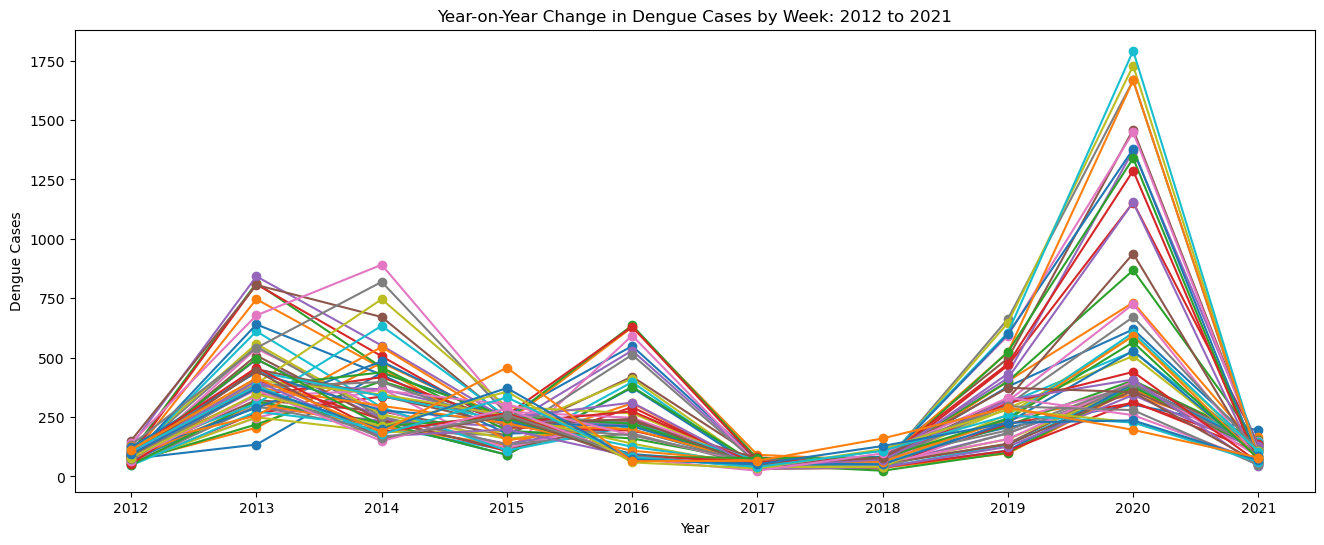

In [13]:
# An overall view of how dengue cases change year-on-year, by week.

plot_yoy_change(
    **params_lines, 
    df=df_dengue_weeks, 
    year_start=2012, 
    year_end=2021, 
    define_xticks=True, 
    xticks=[i for i in range(2012,2022)]
)

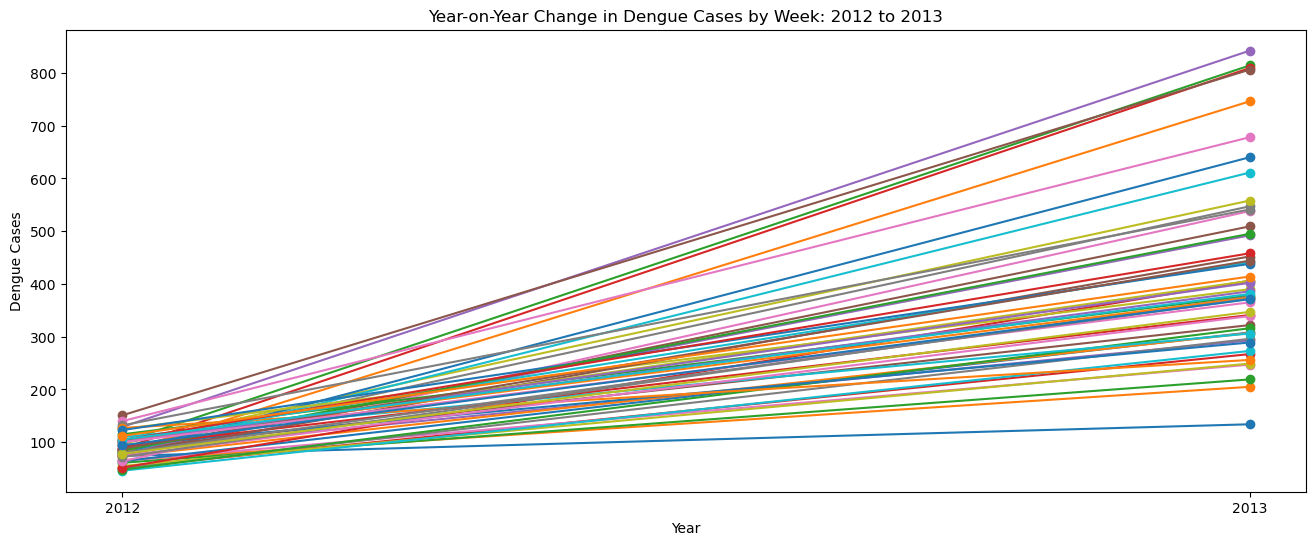

In [14]:
# Plot the year-on-year change, by week, for years 2012 to 2013.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2012, year_end=2013)

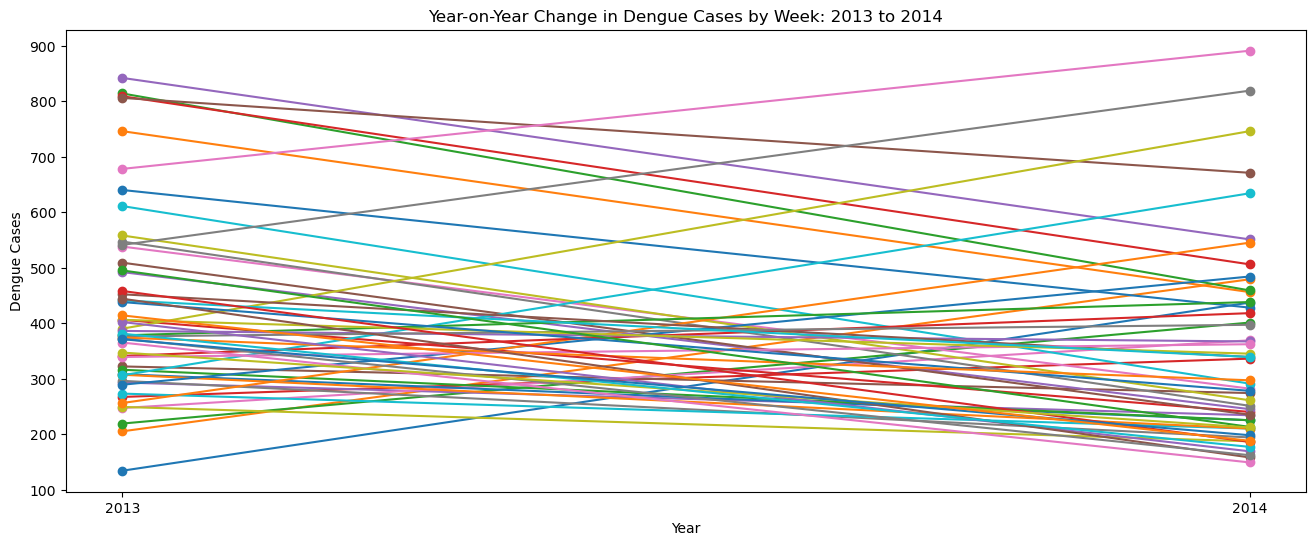

In [15]:
# Plot the year-on-year change, by week, for years 2013 to 2014.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2013, year_end=2014)

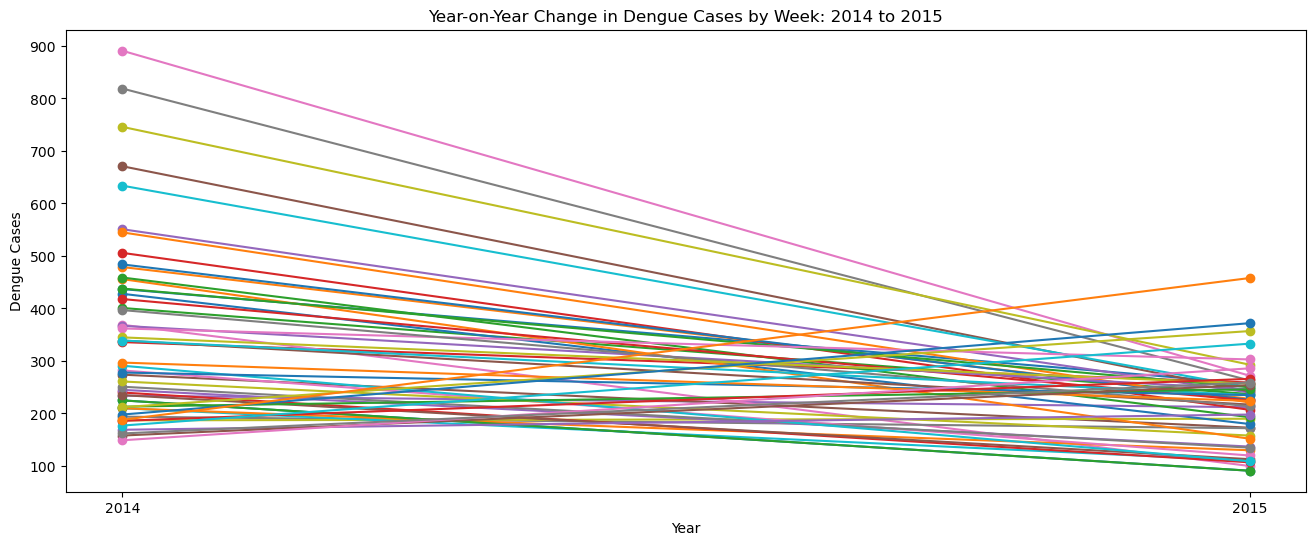

In [16]:
# Plot the year-on-year change, by week, for years 2014 to 2015.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2014, year_end=2015)

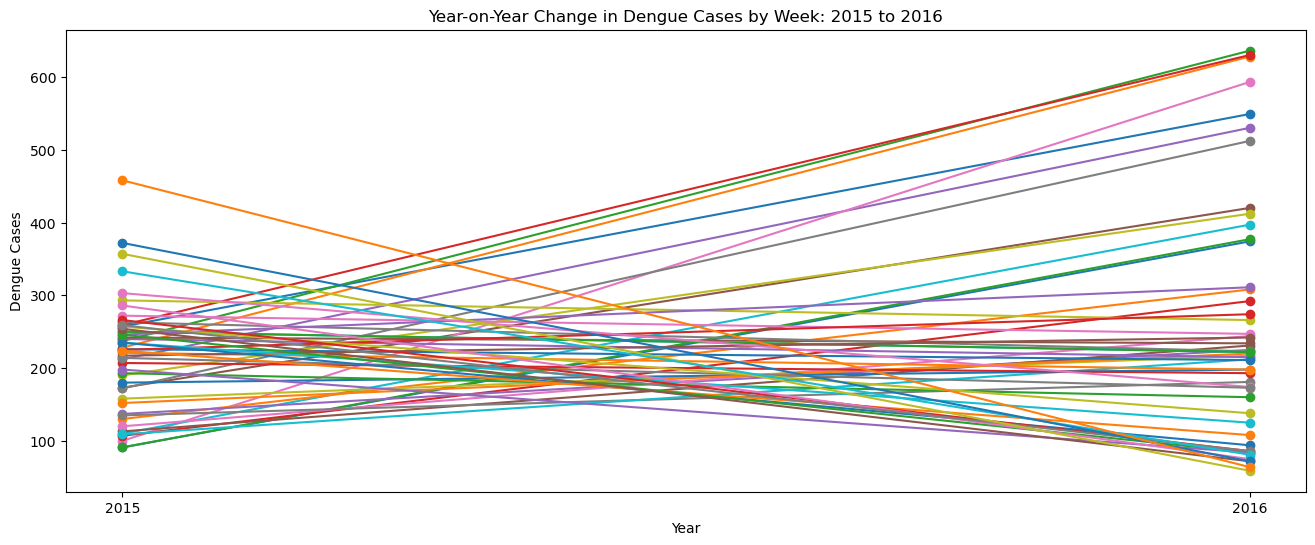

In [17]:
# Plot the year-on-year change, by week, for years 2015 to 2016.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2015, year_end=2016)

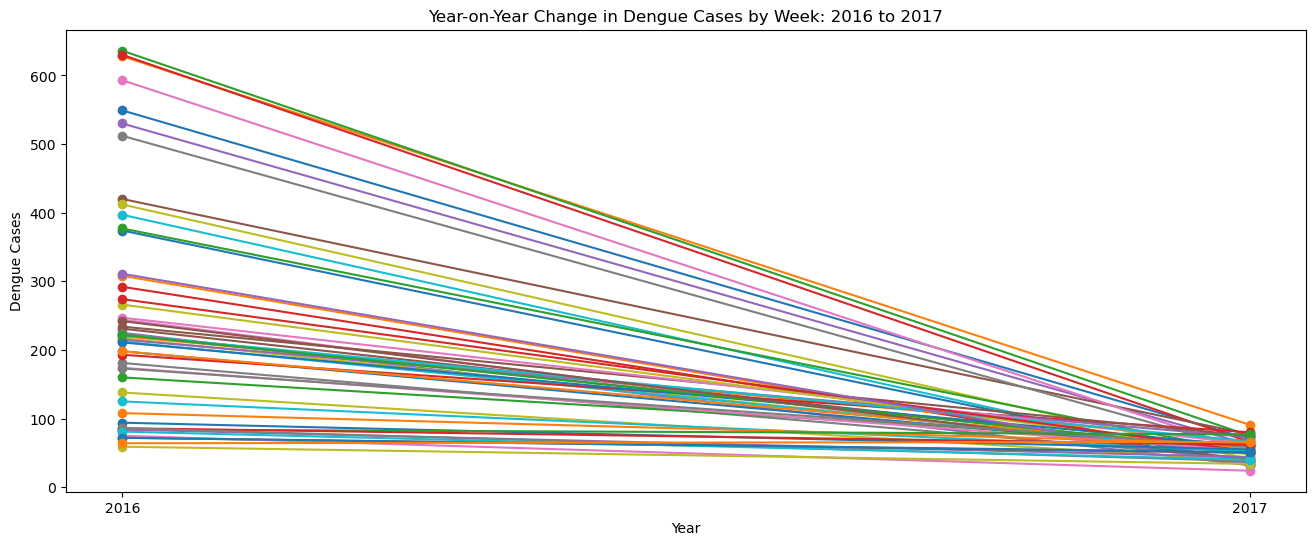

In [18]:
# Plot the year-on-year change, by week, for years 2016 to 2017.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2016, year_end=2017)

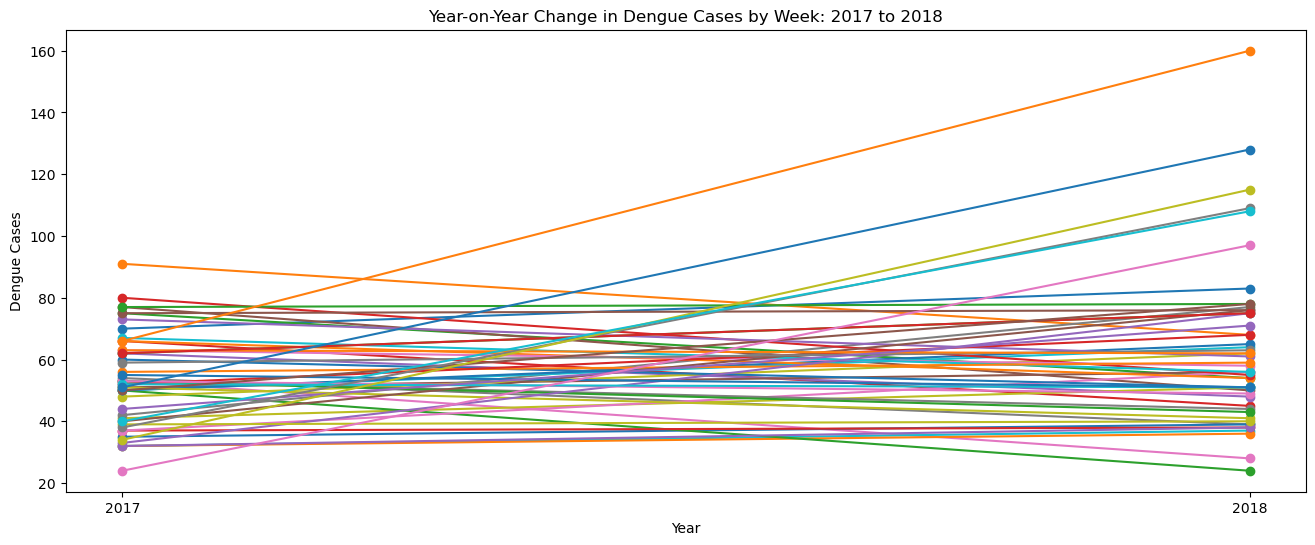

In [19]:
# Plot the year-on-year change, by week, for years 2017 to 2018.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2017, year_end=2018)

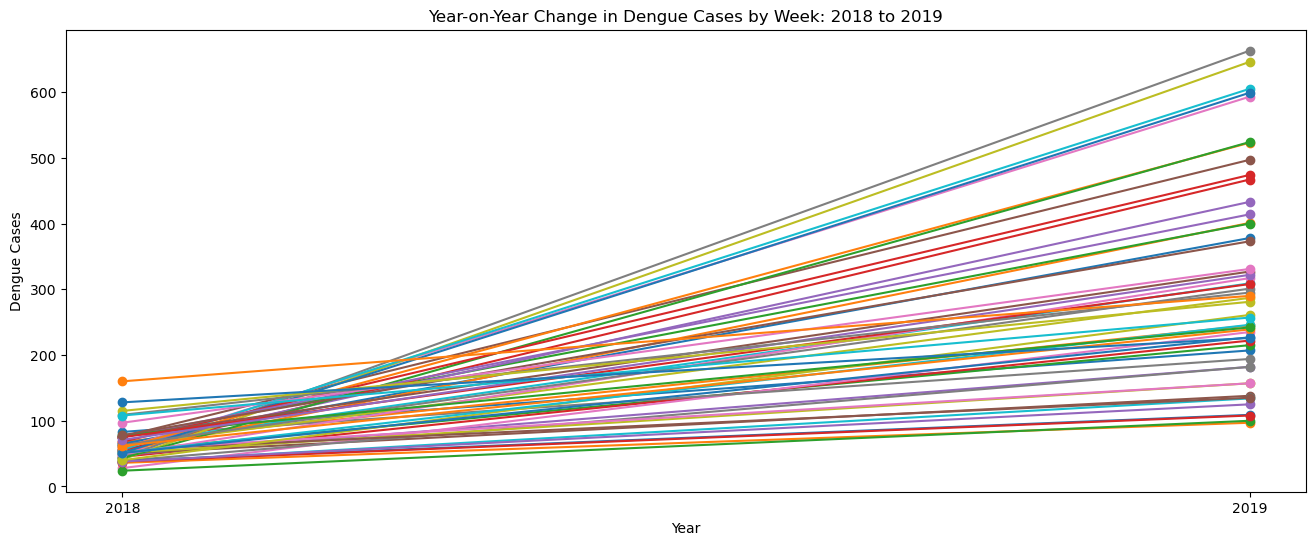

In [20]:
# Plot the year-on-year change, by week, for years 2018 to 2019.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2018, year_end=2019)

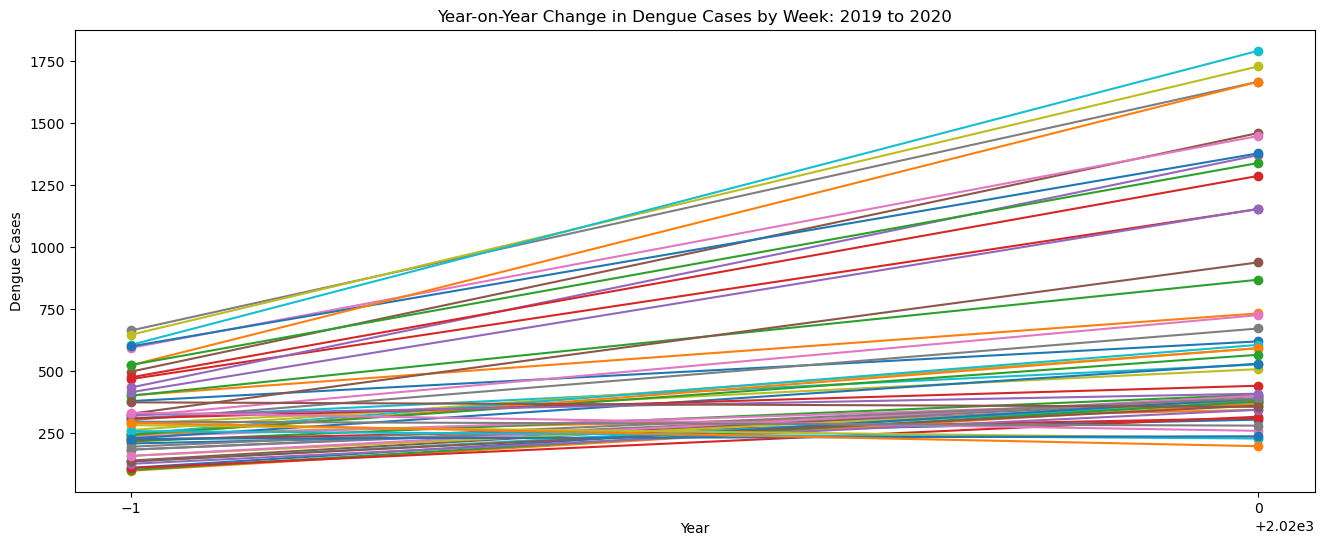

In [21]:
# Plot the year-on-year change, by week, for years 2019 to 2020.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2019, year_end=2020)

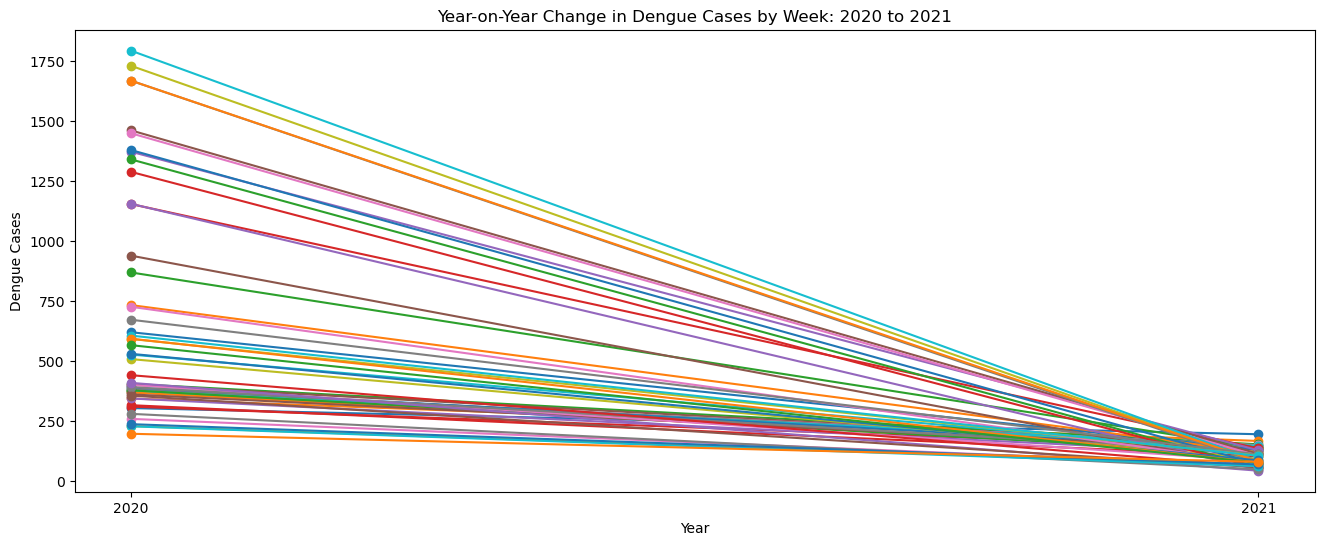

In [22]:
# Plot the year-on-year change, by week, for years 2020 to 2021.

plot_yoy_change(**params_lines, df=df_dengue_weeks, year_start=2020, year_end=2021)

Below, you can get an idea of how different the weeks can be. 

For example, in the line chart shown below, year-on-year changes for the first 3 weeks peak at around 600+ cases. 

On the other hand, year-on-year changes for the middle weeks can experience differences of > 1,600. 

This is why we need to gauge each week against its 'own' set of mean, minimum, maximum and standard deviation values, because historically the weeks can be very different.

This in itself is of course attributable to other factors such as weather, which partially explains why cases tend to peak in the middle of the year during 'outbreak' years.

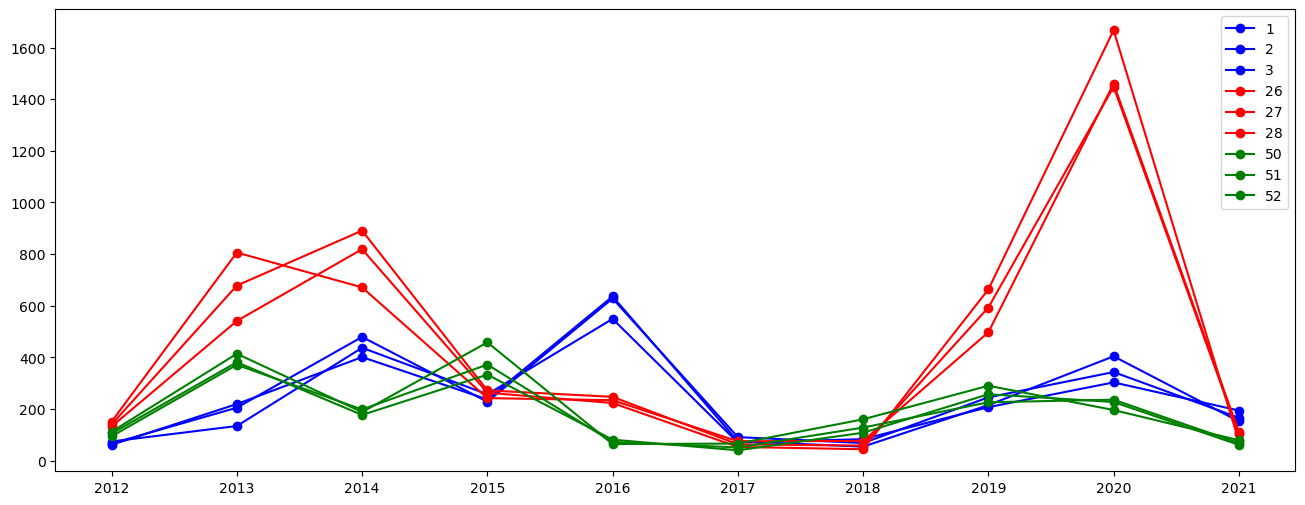

In [23]:
df_dengue_weeks.loc[:2021, [1,2,3,26,27,28,50,51,52]].plot.line(
    marker='o',
    figsize=(16,6),
    xticks=range(2012,2022),
    color=['b', 'b', 'b', 'r', 'r', 'r', 'g', 'g', 'g']
);

In [24]:
# Create a dataframe that shows all of the percentage changes spanning 2012 to 2022.
# This dataframe will be used as the base to create other dataframes that are slices of it.

df_percentage_change = pd.DataFrame()

for year in range(2013,2023):
    df_percentage_change = pd.concat([
        df_percentage_change, 
        get_percentage_change(
            df=df_dengue_weeks, 
            current_year=year, 
            week_start=1, 
            week_end=52
        )], 
        axis=1
    )

The value of sufficient historical data can be seen from the graph below, where the red line represents 2021. 

From this, we know that:
1) 2021 was a calm year with no outbreaks or peaks.
2) 2021 ended on a good note as well, ie., low weekly cases.

If our data were too limited, it would be very difficult to predict 2022, which we now know shaped up to be a rather bad year, dengue-wise, as well.

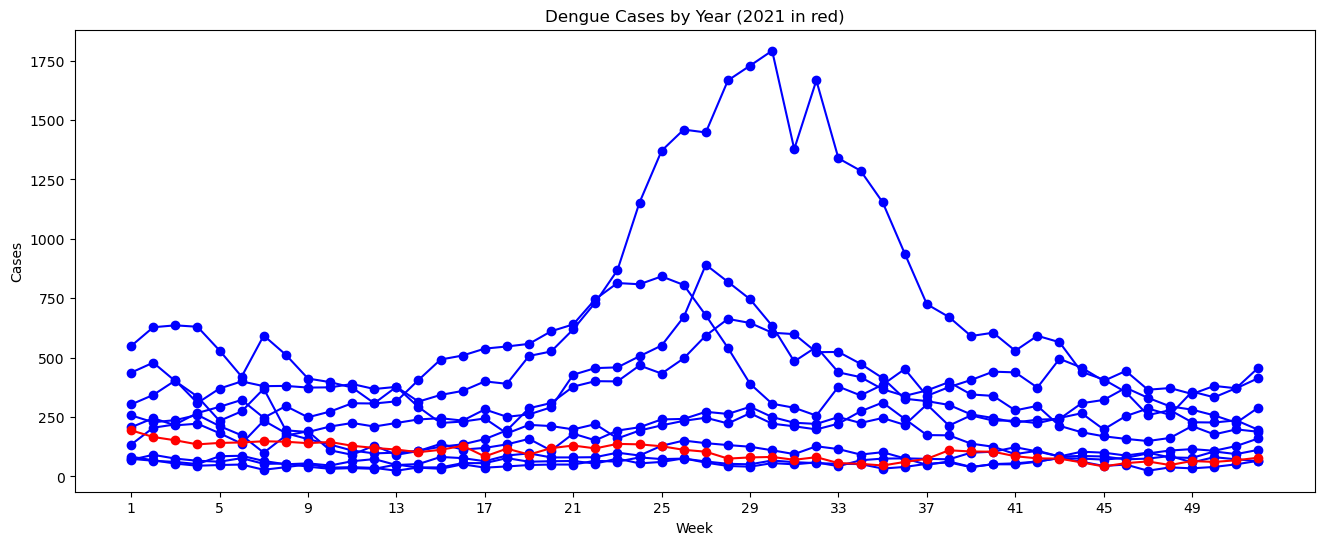

In [25]:
df_dengue_weeks.transpose().loc[:, :2021].plot.line(
    **params_lines,
    color=['b' for i in range(2012,2021)]+['r']
)

plt.xticks([i for i in range(1,53,4)])
plt.xlabel('Week')
plt.ylabel('Cases')
plt.title('Dengue Cases by Year (2021 in red)')
plt.show();

In [26]:
# Using the create_df_ma() function, create a dataframe to be used in predictions for weeks 1 to 7 of 2022.

df_ma_w1_w7 = create_df_ma(df=df_percentage_change, n_weeks_to_drop=52, ma=7)

In [27]:
# Using the get_sign_change() function, create a dictionary that reflects, for each year,
# the number of corresponding points that experienced sign changes.

years_with_sign_changes = {year: [math.floor(i/52)+2013 \
                                  for i in get_sign_change(df=df_ma_w1_w7, col='change_from_prev_ma')].count(year) \
                           for year in range(2013,2022)}

In [28]:
# Even though these numbers suggest that there are frequent direction changes even when using MA-smoothened values...
# ...it matters whether or not these sign changes are significant, or just a blip in an otherwise long-term trend.

years_with_sign_changes

{2013: 9,
 2014: 3,
 2015: 12,
 2016: 9,
 2017: 7,
 2018: 16,
 2019: 7,
 2020: 10,
 2021: 5}

In [29]:
# Create a dictionary containing the desired parameters for the actual vs moving average line graphs.

params_actual_vs_ma = {
    'df': df_percentage_change,
    'params': params_lines,
    'ma_window': 7,
}

We want an MA window that is capable of smoothening out short-term fluctations & capturing longer-term trends without creating an over-smoothened line.

The point of this is to make the estimation process more reliable. We don't want to be swayed by 'short-term shocks'.

That said, we don't want to estimate something that will never be close to the truth.

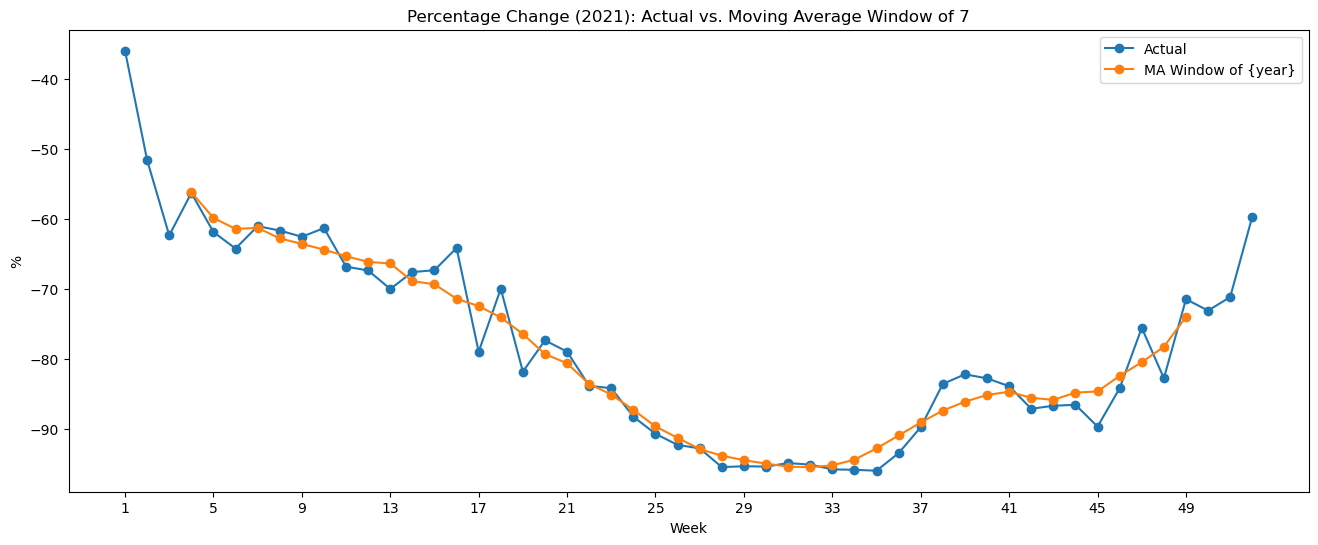

In [30]:
# Using an ma window of (7) to visually check if it is a reasonable fit with 2021 data as an example.

plot_actual_vs_ma(
    **params_actual_vs_ma,
    col='percentage_change_2021'
)

Let's use 2013 as an example. The MA window does a rather good job in capturing the overall trend.

(To avoid inaccuracy, we will refer to the points on the MA window as 'points' rather than 'weeks'. However, to simplify matters, we will use the numbering provided by the x-axis. For example, the 1st point on the orange (MA) line corresponds to week 5 on the x-axis, so we will refer to it as point 5.)

As can be seen, most of these 'sign change' points are actually mere blips, ie., pretty much insignificant. The only ones with real significance, or 'turning points', are points 20, 31 and 40.

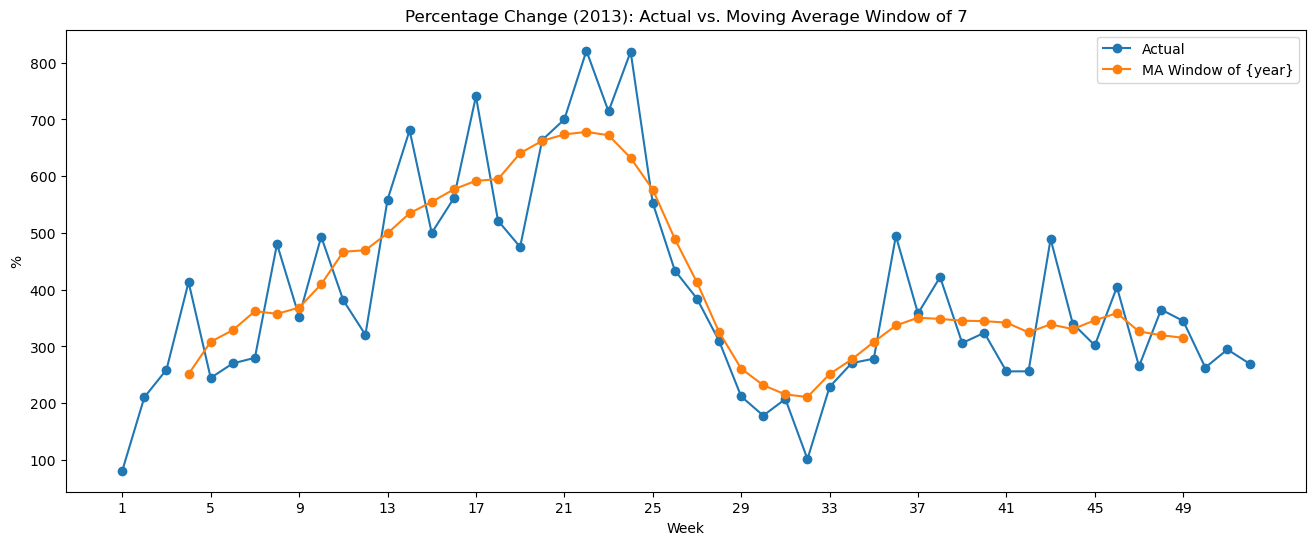

In [31]:
# Same as the above, but to check whether 2013 is a particularly concerning year.

plot_actual_vs_ma(
    **params_actual_vs_ma,
    col='percentage_change_2013'
)

The below is a replica of the graph that was shown all the way above. Once again, we want to be sure that the value we will be 'predicting' does not have any trends that will affect predictions.

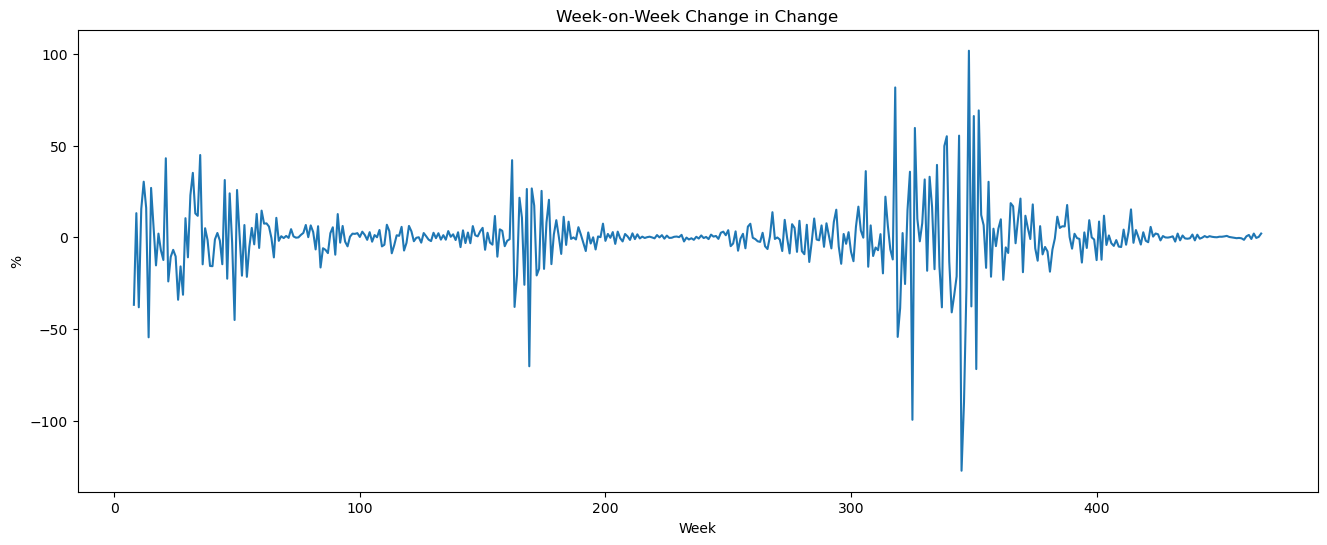

In [32]:
df_ma_w1_w7.change_of_change.plot.line(figsize=(16,6))

plt.xlabel('Week')
plt.ylabel('%')
plt.title(f'Week-on-Week Change in Change')

plt.show();

In [33]:
# Create a variable to store the first year after 2012.

year_1 = 2013

In [34]:
# Create a dataframe that's basically a transposed version of df_dengue_weeks,
# but only retain the 2022 values.
# Then, add an additional column to store predictions.

df_dengue_real_pred = df_dengue_weeks.transpose().drop(
    [i for i in range(2012,2021)], axis=1
).rename(columns={2022: 'actual'})

df_dengue_real_pred = pd.concat([
    df_dengue_real_pred,
    pd.DataFrame(index=df_dengue_real_pred.index, columns=['preds'])
],
    axis=1
)

In [35]:
params_predict = {
    'year':2021, 
    'pred_weeks':[i for i in range(7,14)],
    'df_saveto':df_dengue_real_pred,
    'prev_year':2021
}

In [36]:
# Generate predictions for weeks 1 to 7 of 2022.

w1_to_w7 = Predict(
    **params_predict,
    df=df_ma_w1_w7,
    start_loc=1,
    df_pchange=get_pchange_metrics(df=df_percentage_change, week_start=0)
)

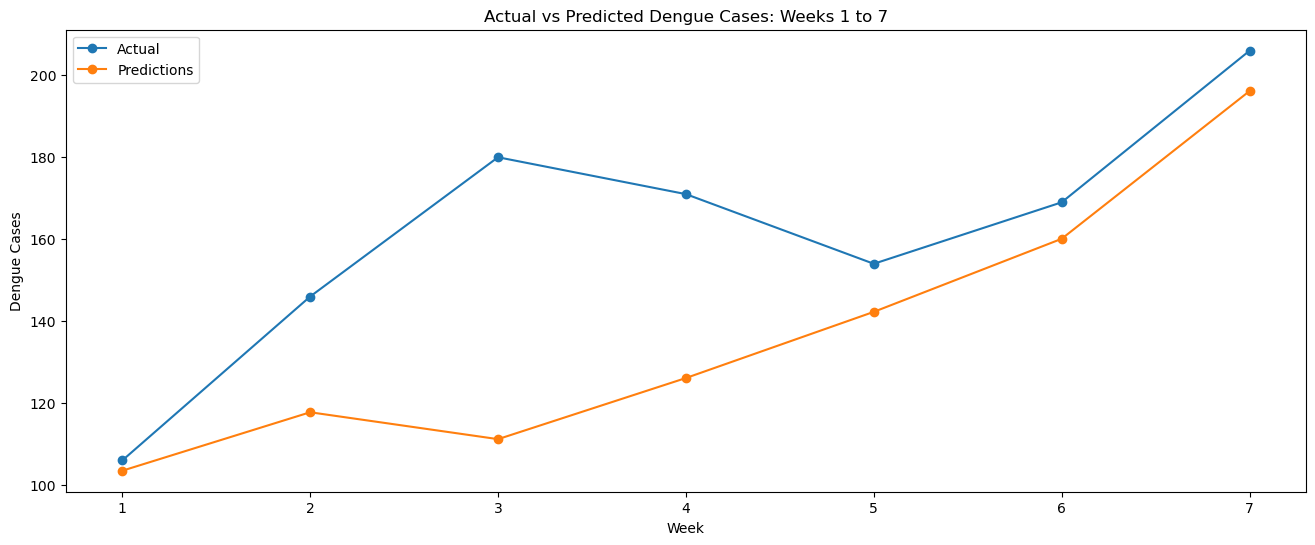

In [37]:
# Plot actual vs predicted values for weeks 1 to 7.

w1_to_w7.plot_real_preds()

In [38]:
# Using the create_df_ma() function, create a dataframe to be used in predictions for weeks 5 to 11 of 2022.

df_ma_w5_w11 = create_df_ma(df=df_percentage_change, n_weeks_to_drop=52-(5-1), ma=7)

In [39]:
# Generate predictions for weeks 5 to 11 of 2022.

w5_to_w11 = Predict(
    **params_predict,
    df=df_ma_w5_w11,
    start_loc=5,
    df_pchange=get_pchange_metrics(df=df_percentage_change, week_start=4)
)

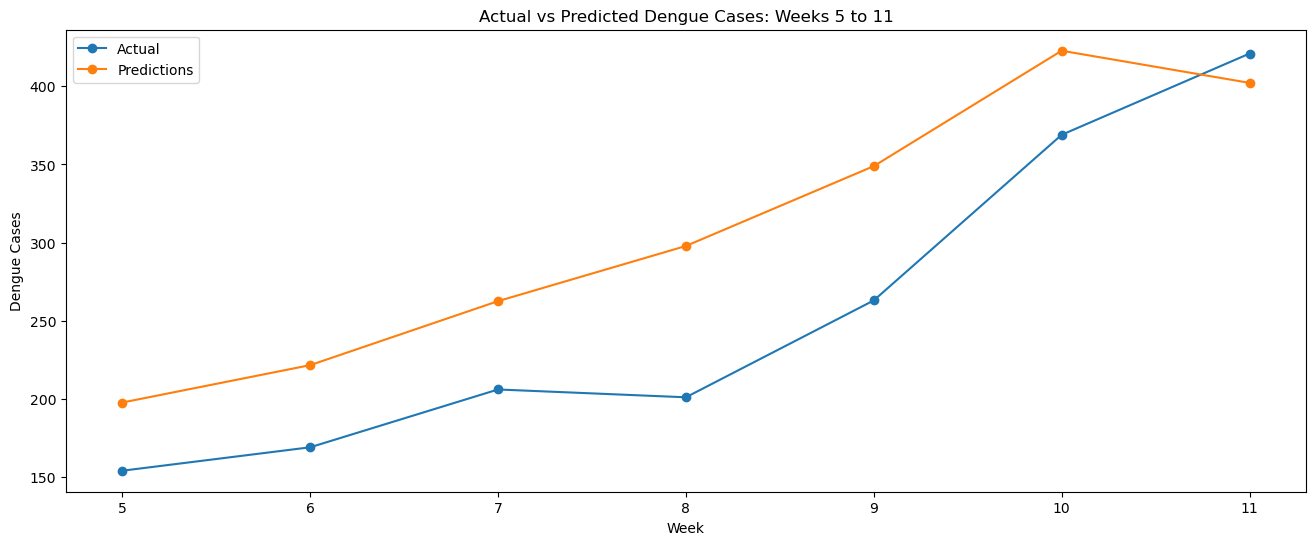

In [40]:
# Plot actual vs predicted values for weeks 5 to 11.

w5_to_w11.plot_real_preds()

In [41]:
# Using the create_df_ma() function, create a dataframe to be used in predictions for weeks 15 to 21 of 2022.

df_ma_w15_w21 = create_df_ma(df=df_percentage_change, n_weeks_to_drop=52-(15-1), ma=7)

In [42]:
# Generate predictions for weeks 15 to 21 of 2022.

w15_to_w21 = Predict(
    **params_predict,
    df=df_ma_w15_w21,
    start_loc=15,
    df_pchange=get_pchange_metrics(df=df_percentage_change, week_start=14)
)

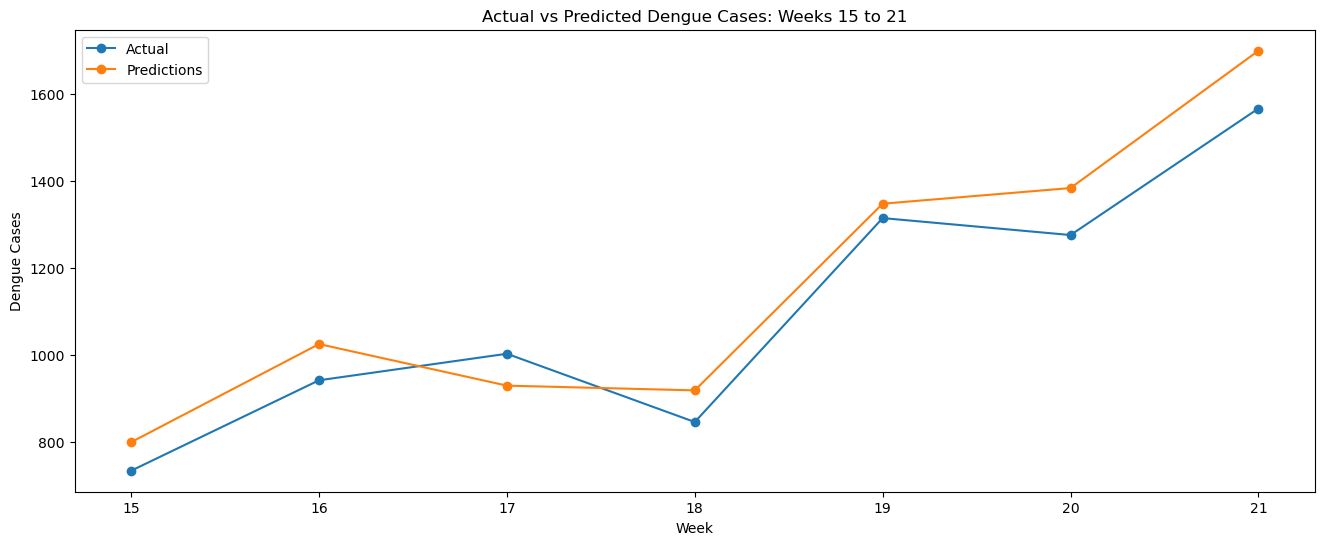

In [43]:
# Plot actual vs predicted values for weeks 15 to 21.

w15_to_w21.plot_real_preds()

In [44]:
# Using the create_df_ma() function, create a dataframe to be used in predictions for weeks 20 to 26 of 2022.

df_ma_w20_w26 = create_df_ma(df=df_percentage_change, n_weeks_to_drop=52-(20-1), ma=7)

In [45]:
# Generate predictions for weeks 20 to 26 of 2022.

w20_to_w26 = Predict(
    **params_predict,
    df=df_ma_w20_w26,
    start_loc=20,
    df_pchange=get_pchange_metrics(df=df_percentage_change, week_start=19)
)

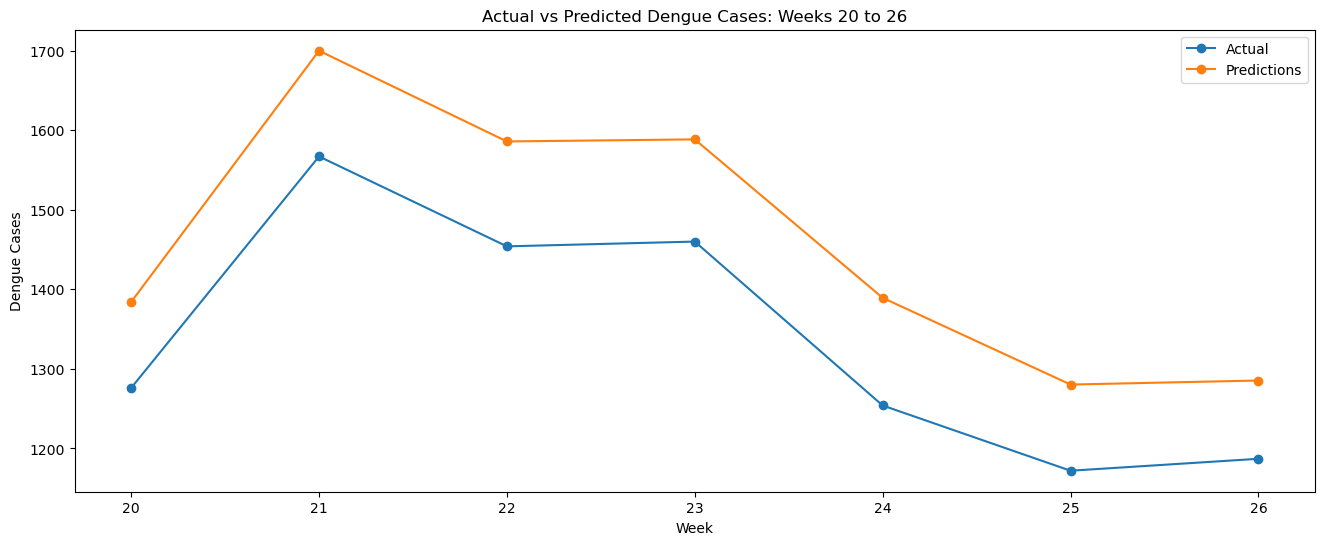

In [46]:
# Plot actual vs predicted values for weeks 20 to 26.

w20_to_w26.plot_real_preds()

In [47]:
# Using the create_df_ma() function, create a dataframe to be used in predictions for weeks 23 to 29 of 2022.

df_ma_w23_w29 = create_df_ma(df=df_percentage_change, n_weeks_to_drop=52-(23-1), ma=7)

In [48]:
# Generate predictions for weeks 23 to 29 of 2022.

w23_to_w29 = Predict(
    **params_predict,
    df=df_ma_w23_w29,
    start_loc=23,
    df_pchange=get_pchange_metrics(df=df_percentage_change, week_start=22)
)

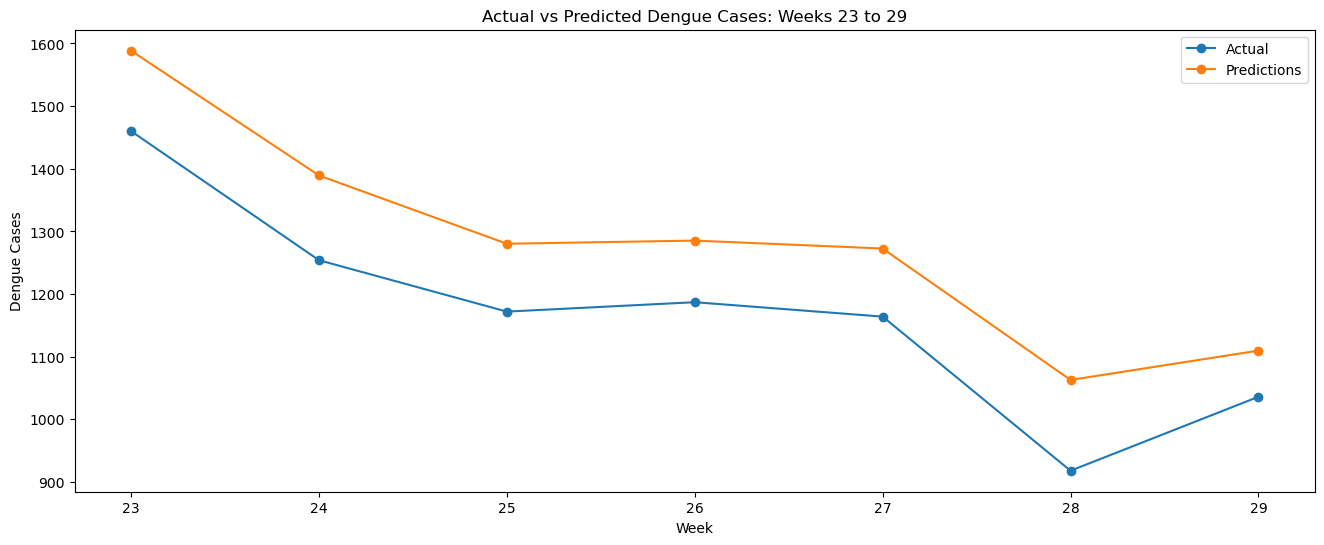

In [49]:
# Plot actual vs predicted values for weeks 23 to 29.

w23_to_w29.plot_real_preds()

In [50]:
# Using the create_df_ma() function, create a dataframe to be used in predictions for weeks 30 to 36 of 2022.

df_ma_w30_w36 = create_df_ma(df=df_percentage_change, n_weeks_to_drop=52-(30-1), ma=7)

In [51]:
# Generate predictions for weeks 30 to 36 of 2022.

w30_to_w36 = Predict(
    **params_predict,
    df=df_ma_w30_w36,
    start_loc=30,
    df_pchange=get_pchange_metrics(df=df_percentage_change, week_start=29)
)

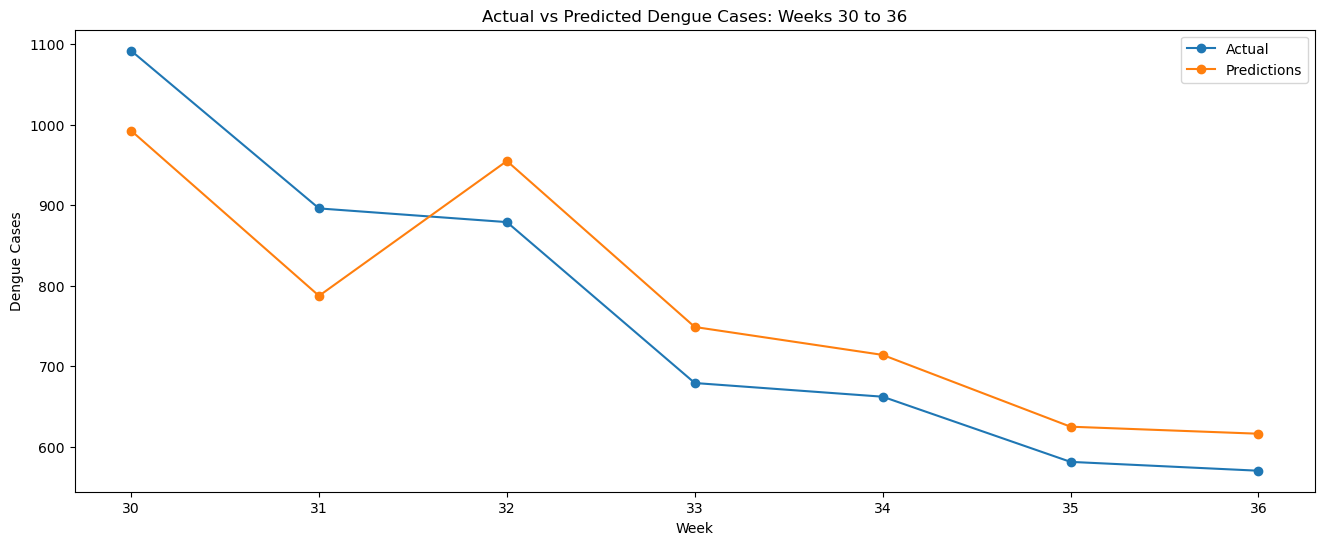

In [52]:
# Plot actual vs predicted values for weeks 30 to 36.

w30_to_w36.plot_real_preds()

In [53]:
# Using the create_df_ma() function, create a dataframe to be used in predictions for weeks 40 to 46 of 2022.

df_ma_w40_w46 = create_df_ma(df=df_percentage_change, n_weeks_to_drop=52-(40-1), ma=7)

In [54]:
# Generate predictions for weeks 40 to 46 of 2022.

w40_to_w46 = Predict(
    **params_predict,
    df=df_ma_w40_w46,
    start_loc=40,
    df_pchange=get_pchange_metrics(df=df_percentage_change, week_start=39)
)

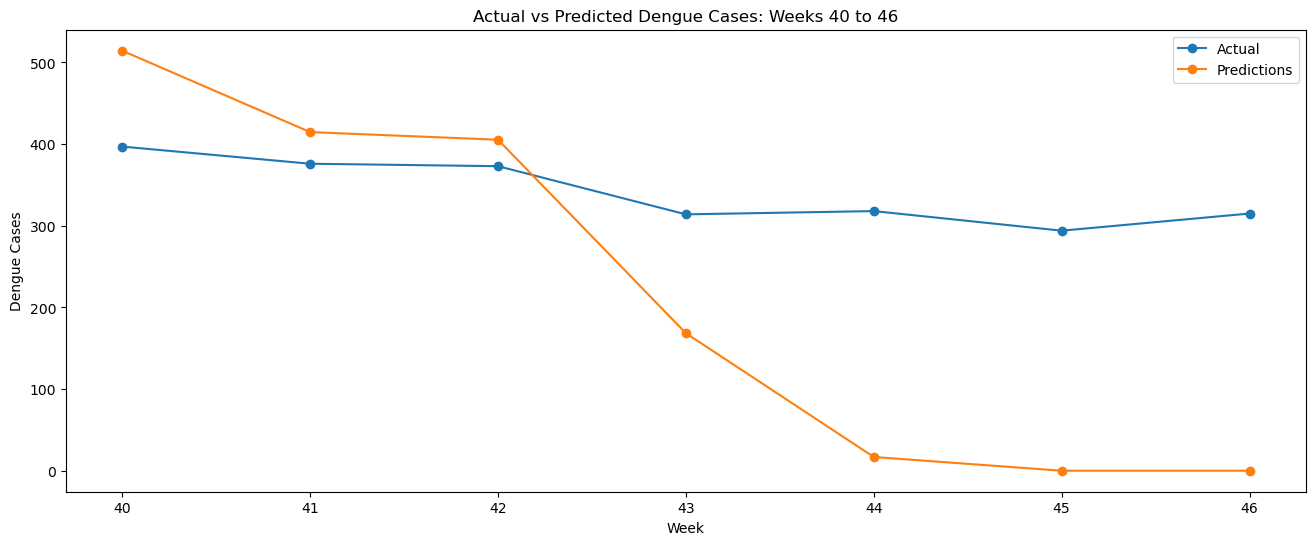

In [55]:
# Plot actual vs predicted values for weeks 40 to 46.

w40_to_w46.plot_real_preds()

In [56]:
# Using the create_df_ma() function, create a dataframe to be used in predictions for weeks 46 to 52 of 2022.

df_ma_w46_w52 = create_df_ma(df=df_percentage_change, n_weeks_to_drop=52-(46-1), ma=7)

In [57]:
# Generate predictions for weeks 46 to 52 of 2022.

w46_to_w52 = Predict(
    **params_predict,
    df=df_ma_w46_w52,
    start_loc=46,
    df_pchange=get_pchange_metrics(df=df_percentage_change, week_start=45)
)

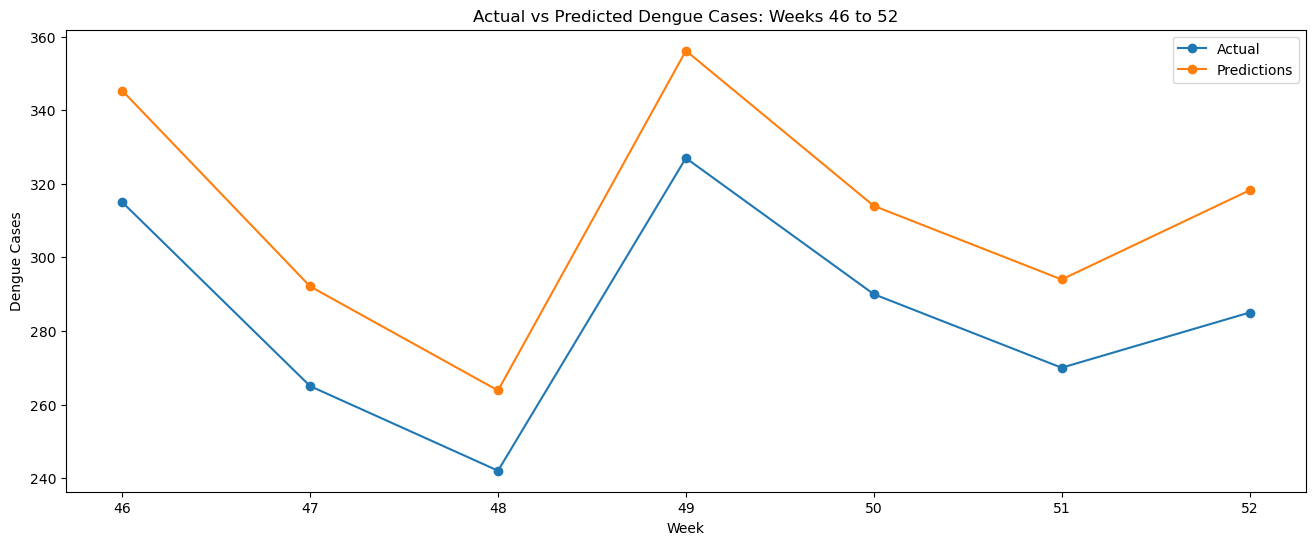

In [58]:
# Plot actual vs predicted values for weeks 46 to 52.

w46_to_w52.plot_real_preds()

In [59]:
# Create a dataframe that stores the RMSE & MAPE values from all predictions generated above.

df_evals = pd.DataFrame(index=range(8), columns=['week_start', 'week_end', 'rmse', 'mape'])

for model, i in zip([
    w1_to_w7,
    w5_to_w11,
    w15_to_w21,
    w20_to_w26,
    w23_to_w29,
    w30_to_w36,
    w40_to_w46,
    w46_to_w52
],
    range(df_evals.shape[0])
):
    
    df_evals.loc[i, 'week_start'] = model.start_loc
    df_evals.loc[i, 'week_end'] = model.start_loc + 6
    df_evals.loc[i, 'rmse'] = model.rmse
    df_evals.loc[i, 'mape'] = model.mape

In [60]:
df_evals

week_start week_end        rmse       mape
0          1        7    33.52096  14.834824
1          5       11   63.111176  26.686129
2         15       21   86.476219   7.593971
3         20       26  121.265191   9.019242
4         23       29  116.161474    9.90751
5         30       36   74.660622   9.080088
6         40       46  211.760955  55.663382
7         46       52   27.356968    9.51746

---
## Evaluation
---

### Feedback on Model Performance

We picked random points to generate predictions, each with a forecast horizon of 7 weeks. In most cases, the general 'trend' mirrored that of the actual values, even though the predictions were not 'spot-on'.

MAPE ranged from a low of 7.6% to a high of 55.7%, with the latter happening in the set of predictions from weeks 40 to 46. Specifically, the model erroneously predicted a dip in cases. That said, MAPE was relatively low on average, indicating that predictions were generally reliable.

The above was achieved after some tweaking, notably, of the 'throttling' effect mentioned right at the beginning where predicted percentage changes were restricted based on historical minimum, maximum and standard deviation specific to the week being predicted. This turned out to be a very important factor, which means that the end-user may want to carefully consider it when utilising the model to generate predictions for the future.


### Considerations for the Future

This model was created solely based on historical data of dengue cases. While this does mean a lot less 'work' is needed to use / finetune it, it also means that everything depends on the sole factor being used: historical data of dengue cases. The implication here is that the range and validity of historical data is very important, and may require some careful thought. For example, in the generation of these predictions, it was likely important that the historical data covered the widest possible range within a relatively short period of time; we had the luxury of access to both the 'lows' of 2017/2018 as well as the 'high' of 2020, and everything in between. Once again, this brings us to the impact of external factors on forecasting, which we will briefly reiterate below.

---
## Limitations, Suggestions & Applications
---

### Limitations & Suggestions

Apart from the useful patterns that emerged upon examination of the data, one of the reasons we opted for this approach was due to a lack of information. As mentioned above, dengue is affected by a vast number of factors that are _implicit_ in the case numbers themselves. What happens when a factor changes? The case numbers will change, but with the factor being implicit, it would be difficult to accurately generate predictions based on existing models. But having to generate a new model every time something happens defeats the point, and likely means that predictions for that particular period would be quite 'off-the-mark'. This would be an especially problematic issue if end-users rely heavily on the forecasting model and make their decisions based on it.

Does this mean that we should not build forecasting models? Of course not. It can be done, but that's not to say that the current process is perfect. In the course of this project, we discovered many factors that have an impact on dengue case numbers, and surely more remain to be unearthed. Specifically, the latter is probably known by _you_, the domain experts over at NEA. Through good communication and discussion, it is possible to make the implicit _explicit_, which in turn positively impacts forecasting. 

We could start 'small', by gaining access to data that probably exists but not publicly. A good example would be Gravitrap numbers, as well as weekly data on serotypes-circulation. These two factors, combined, would surely explain certain trends in case numbers. Following this, we could further improve forecasting by including other perhaps less quantifiable aspects such as factors that rely on judgement. Domain experts are often able to make accurate predictions, although they may not be able to quantify them in numbers. With our help, we could attempt to model these factors, thus gradually improving the model over time, until it becomes a robust, reliable model that can withstand the test of time.


### Applications

When applying the model, it is important to consider, especially at this stage when none of the suggestions mentioned above have been implemented yet, that expectations must be rooted in information and reality.

For example, if we were to use the generated predictions above for the first half of the year and implement VCM, does this mean that we can assume that actual case numbers would be lower than the predicted values for the second half of the year? The answer is that it depends, but it is not very likely that that would be the case. Why?

Consider what we mentioned above about implicit data. Singapore has a rather robust approach towards control of dengue cases in the form of VCM. In some years, model or not, there may have been obvious enough factors that make them implement VCM earlier than usual, or perhaps, following a particularly bad year, aggressive VCM were implemented for a sustained amount of time; 2020 - 2021 is a good example of the latter.

In other words, the implicit data being contained within the dengue case numbers is the fact that VCM _were_ also implemented in previous years, though the exact time may differ. Therefore, while it is _possible_ that case numbers would drop below the predicted numbers, it is important to carefully consider all existing factors _before_ reaching such a conclusion. If there are very valid reasons to believe that things have been done differently _as a result_ of the model, then perhaps such a conclusion would be suitable.

Therefore, how the model is being used is very important. If measures differ from previous years as a result of using the model, then some additional impact may be had, and it would be or the best if such factors could be included into future iterations of the model as well. In the end, a model is only as good as the information it is fed. While this statement may sound grave, it is actually an optimistic one - it means that it is fully within our control to create a state-of-the-art model capable of forecasting very accurate predictions an impressive amount of time into the future. The key here is working together and harnessing one another's expertise to build something with potentially far-reaching benefits, for the good of everyone in the nation.

### Conclusions and Recommendations
Conclusions:
- The climate of Singapore which involves higher temperatures during the middle of the year and high tropical rainfall correlates strongly to dengue cases
- The low herd immunity to new dengue strain denv3 resulted in the dengue outbreak in 2020
- Singapore's dense population coupled with Work From Home policies (where people work at naturally ventilated homes) in 2020 resulted in the dengue outbreak
- The dengue outbreaks are concentrated on the East/North East of Singapore
- Project Wolbachia would be effective for deployment in Year 2022, projected to reduce up to 11,000 cases, and reduce economic impact of dengue by 41m$

Recommendations:
- NEA to spend more resources in vector control in East and North East
- Consider climate change predictors into future model
- Consider amount of Wolbachia Mosquito to be released, in the model
- Model dengue outbreak by postal sector/district

---
## Appendix
---

Shown below is an earlier iteration of a model we build based on weather predictors. Unfortunately, there are some errors, specifically for the cumulative values. That said, you are welcome to take a look at it.

In [61]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor, Pool

import matplotlib.pyplot as plt

In [62]:
# Function to insert a column reflecting summed values for a particular feature.

def get_summed_data(df=None, col=None, special_year=None, week_start=None):
    
    '''   
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to be used in function.
    col : str
        Column of DataFrame to extract data from.
        Either 'total_rainfall' or 'dengue_cases'.
    special_year : int
        Year that requires the function to only be applied from a certain week onwards.
    week_start : int
        For the year specified in the parameter 'year', the corresponding week to start applying the function to.
        Ranges from 1 to 52.
    '''
    
    
    # Create a new column.
    df[f'summed_{col}'] = 0
    
    # Loop through each year in the dataset.
    for year in df.year.unique():
        
        # Get the rows for the current year.
        year_rows = df[df.year == year]

        # Set the initial summed value to zero.
        summed_total = 0
        
        if year == special_year:

            # Loop through each row in the year's data.
            for index, row in year_rows.iterrows():

                if row['week'] < week_start:

                    pass

                else:

                    # If the timeframe is 1, reset the summed total to zero.
                    if row['week'] == week_start:
                        summed_total = 0

                    # Add the current week's value to the summed total.
                    summed_total += row[col]

                    # Set the summed total value for the current row
                    df.at[index, f'summed_{col}'] = summed_total
                    
        else:
            
            # Loop through each row in the year's data.
            for index, row in year_rows.iterrows():
                
                # If the timeframe is 1, reset the summed total to zero.
                if row['week'] == 1:
                    summed_total = 0

                # Add the current week's value to the summed total.
                summed_total += row[col]

                # Set the summed total value for the current row
                df.at[index, f'summed_{col}'] = summed_total

In [63]:
def plot_multiple_lines(
    df=None,
    colours=None,
    xlabel='Week',
    ylabel='Cases',
    legend_labels=['', ''],
    title='Weekly Dengue Cases Across the Years',
    xticks=1,
    set_yaxis=False,
    ymin=0,
    ymax=800,
    v_line=False,
    line=None,
    marker='o',
    **kwargs
):

    # Set resulting figure size.
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Plot each column in the dataframe as a line graph.
    for col, colour, label in zip(df.columns, colours, legend_labels):
        ax.plot(df[col], label=label, color=colour, linestyle='solid', marker=marker)

    ax = plt.gca()
    
    # Include user-defined y-axis limits.
    if set_yaxis:
        ax.set_ylim([ymin, ymax])
        
    # Set the x ticks for the x-axis for intervals specified by the user.
    ax.set_xticks(df.index[::xticks])
    
    # If opted for, include a vertical line at the desired position.
    if v_line:
        ax.axvline(x=line, color='k', linestyle='--')
        
    # Set the axis labels and title.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Add a legend to the plot.
    ax.legend()

In [64]:
# Class that does everything from data-splitting to modelling.

class Model():
    
    # Initiate parameters and run the class functions.
    def __init__(
        self, 
        df=None,
        X_train_periods=['2012-W26', '2018-W32'],
        X_test_periods=['2018-W33', '2018-W52'],
        y_train_periods=['2012-W46', '2018-W52'],
        y_test_periods=['2019-W01', '2019-W20'],
        cat_features=[],
        num_features=[],
        params_grid=None,
        **kwargs
    ):
        
        self.df = df
        self.X_train_periods = X_train_periods
        self.X_test_periods = X_test_periods
        self.y_train_periods = y_train_periods
        self.y_test_periods = y_test_periods
        self.cat_features = cat_features
        self.num_features = num_features
        self.params_grid = params_grid
        
        self.tts()
        self.scale()
        self.model()
        self.get_real_pred()
       
    
    # Function that splits the data into training and testing sets.
    def tts(self):

        self.length = self.df.loc[self.y_train_periods[0]: self.y_test_periods[1]].shape[0]
        
        # Split the data into training and testing sets with an implied lag period.
        # Lag period is implied in the difference between the periods used for the training and testing sets.
        self.X_train = self.df.loc[self.X_train_periods[0]:self.X_train_periods[1], :]
        self.X_test = self.df.loc[self.X_test_periods[0]:self.X_test_periods[1], :]
        self.y_train = self.df.loc[self.y_train_periods[0]:self.y_train_periods[1], 'dengue_cases'].values
        self.y_test = self.df.loc[self.y_test_periods[0]:self.y_test_periods[1], 'dengue_cases'].values

        
    # Functions that scales the training & test data.
    def scale(self):
        
        # Create a subset of the training & test data that includes only the categorical features.
        self.X_train_cat = self.X_train[self.cat_features]
        self.X_test_cat = self.X_test[self.cat_features]

        # Scale the numerical features.
        self.ss = StandardScaler()
        self.ss.fit(self.X_train[self.num_features])

        # Place the scaled data into dataframes.
        self.X_train_ss = pd.DataFrame(self.ss.transform(self.X_train[self.num_features]), columns=self.num_features).set_index(self.X_train_cat.index)
        self.X_test_ss = pd.DataFrame(self.ss.transform(self.X_test[self.num_features]), columns=self.num_features).set_index(self.X_test_cat.index)

        # Put together the training & test data again, now with the scaled numerical features.
        self.X_train_complete = pd.concat([self.X_train_ss, self.X_train_cat], axis=1)
        self.X_test_complete = pd.concat([self.X_test_ss, self.X_test_cat], axis=1)
        
        # Using CatBoostRegressor's Pool function, create a training pool to pass into the model later.
        self.train_pool = Pool(self.X_train_complete, self.y_train, cat_features=self.cat_features)
    
    
    # Function that fits a model (CatBoostRegressor) on the data.
    def model(self):
        
        # Initiate and fit a CatBoostRegressor model.
        self.model = CatBoostRegressor(cat_features=self.cat_features, random_seed=42, verbose=False, **self.params_grid) 
        self.model.fit(self.train_pool)

        # Generate predictions from the model.
        self.y_pred_test = self.model.predict(self.X_test_complete)
        self.y_pred_train = self.model.predict(self.X_train_complete)

        # Calculate RMSE values.
        self.rmse_test = np.sqrt(mean_squared_error(self.y_test, self.y_pred_test))
        self.rmse_train = np.sqrt(mean_squared_error(self.y_train, self.y_pred_train))
        
        
    # Function that creates a dataframe containing all actual & predicted values.
    def get_real_pred(self):
    
        # Apply 2 levels of concatenation to generate dataframe of actual & predicted values.
        # The 1st level of concatenation involves concatenating the training & test data for the actual & predicted values respectively.
        # The 2nd level of concatenation involves the 2 dataframes generated from the 1st level of concatenation.
        self.df_real_pred = pd.concat(
            [pd.concat(
                [pd.DataFrame(self.y_train).rename(columns={0:'y_actual'}), 
                        pd.DataFrame(self.y_pred_train).rename(columns={0:'y_pred'})], 
                       axis=1),
             pd.concat(
                 [pd.DataFrame(self.y_test).rename(columns={0:'y_actual'}), 
                  pd.DataFrame(self.y_pred_test).rename(columns={0:'y_pred'})], 
                 axis=1)], 
            axis=0).set_index(self.df.loc[self.y_train_periods[0]:self.y_test_periods[1], :].index)
        
    
    # Function that obtains feature importance according to CatBoost and creates a dataframe based on it.
    def get_feature_importance(self):
        
        # Dataframe will be ranked by importance.
        # Note that 'importance' in this case refers to how much 'influence' any particular model has over that specific iteration of the model.
        # Ie., not to be confused with feature importance in 'reality'.
        # All values add up to 100.
        self.model_feature_importance = pd.concat(
            [
                pd.DataFrame(self.X_test_complete.columns).rename(columns={0:'feature'}), 
                pd.DataFrame(self.model.get_feature_importance()).rename(columns={0:f'importance_{self.y_test_periods[0]}'})
            ], 
            axis=1
        ).set_index('feature')
        
        return self.model_feature_importance

In [65]:
# Read in data.

path = '../data/'

df_weekly = pd.read_csv(f'{path}weekly_data.csv').rename(columns={'Unnamed: 0': 'year_week'}).set_index('year_week')

In [66]:
get_summed_data(df=df_weekly, col='total_rainfall')
get_summed_data(df=df_weekly, col='dengue_cases')

In [67]:
# Lag various features.

df_weekly['summed_total_rainfall_shifted'] = df_weekly.summed_total_rainfall.shift(10)
df_weekly['maximum_temperature_shifted'] = df_weekly.maximum_temperature.shift(11)
df_weekly['minimum_temperature_shifted'] = df_weekly.minimum_temperature.shift(1)
df_weekly['max_wind_speed_mean_shifted'] = df_weekly.max_wind_speed_mean.shift(4)
df_weekly['dengue_cases_shifted'] = df_weekly.dengue_cases.shift(3)
df_weekly['dengue_cases_shifted_2'] = df_weekly.dengue_cases.shift(1)
df_weekly['summed_dengue_cases_shifted'] = df_weekly.summed_dengue_cases.shift(15) 
df_weekly['summed_dengue_cases_shifted_2'] = df_weekly.summed_dengue_cases.shift(27) 
df_weekly['summed_dengue_cases_shifted_3'] = df_weekly.summed_dengue_cases.shift(32)

In [68]:
# Specify categorical features.

cat_features = [
    # 'year',
    # 'week',
]

In [69]:
# Specify numerical features.


num_features = [
    'total_rainfall',
    'summed_total_rainfall',
    'summed_total_rainfall_shifted',
    'minimum_temperature',
    'minimum_temperature_shifted',
    'maximum_temperature_shifted',
    'mean_wind_speed',
    'max_wind_speed_mean_shifted',
    'dengue_cases',
    'dengue_cases_shifted',
    'dengue_cases_shifted_2',
    'summed_dengue_cases',
    'summed_dengue_cases_shifted',
    'summed_dengue_cases_shifted_2',
    'summed_dengue_cases_shifted_3'
]

In [70]:
# Create a parameter grid for the model.

params_grid = {
    'iterations': 1000,
    'subsample': 0.75, 
    'colsample_bylevel': 0.8,
    'l2_leaf_reg': 10,
    'depth': 3,
    'bagging_temperature': 20,
    'random_strength': 50
}

In [71]:
# Create dictionaries of training and test periods to input into the model.

train_and_test_periods = {
    'w01_w20': {
        'X_train_periods': ['2012-W26', '2018-W32'],
        'X_test_periods': ['2018-W33', '2018-W52'],
        'y_train_periods': ['2012-W46', '2018-W52'],
        'y_test_periods': ['2019-W01', '2019-W20'],
    },
    'w13_w32': {
        'X_train_periods': ['2012-W38', '2018-W44'],
        'X_test_periods': ['2018-W45', '2019-W12'],
        'y_train_periods': ['2013-W06', '2019-W12'],
        'y_test_periods': ['2019-W13', '2019-W32']
    },
    'w23_w42': {
        'X_train_periods': ['2012-W48', '2019-W02'],
        'X_test_periods': ['2019-W03', '2019-W22'],
        'y_train_periods': ['2013-W16', '2019-W22'],
        'y_test_periods': ['2019-W23', '2019-W42']
    },
    'w33_w52': {
        'X_train_periods': ['2013-W06', '2019-W12'],
        'X_test_periods': ['2019-W13', '2019-W32'],
        'y_train_periods': ['2013-W26', '2019-W32'],
        'y_test_periods': ['2019-W33', '2019-W52']
    }
}

In [72]:
# Run the model for weeks 1 to 20.

catboost_w01_w20 = Model(
    df=df_weekly,
    cat_features=cat_features,
    num_features=num_features,
    params_grid=params_grid,
    **train_and_test_periods['w01_w20']
)

In [73]:
# Run the model for weeks 13 to 32.

catboost_w13_w32 = Model(
    df=df_weekly,
    cat_features=cat_features,
    num_features=num_features,
    params_grid=params_grid,
    **train_and_test_periods['w13_w32']
)

In [74]:
# Run the model for weeks 23 to 42.

catboost_w23_w42 = Model(
    df=df_weekly,
    cat_features=cat_features,
    num_features=num_features,
    params_grid=params_grid,
    **train_and_test_periods['w23_w42']
)

In [75]:
# Run the model for weeks 33 to 52.

catboost_w33_w52 = Model(
    df=df_weekly,
    cat_features=cat_features,
    num_features=num_features,
    params_grid=params_grid,
    **train_and_test_periods['w33_w52']
)

In [76]:
# Obtain compiled feature importance across different models / time periods.

feature_importance = pd.concat(
    [
        catboost_w01_w20.get_feature_importance(),
        catboost_w13_w32.get_feature_importance(),
        catboost_w23_w42.get_feature_importance(),
        catboost_w33_w52.get_feature_importance()
    ],
    axis=1
)

In [77]:
# Get an idea of feature importance / influence.
# The more 'crucial' time period (debatable), ie., W13 because it captures the rise, peak and drop, is what's used to sort.

feature_importance.sort_values('importance_2019-W13', ascending=False)

importance_2019-W01  importance_2019-W13  \
feature                                                                   
summed_dengue_cases_shifted              16.189919            15.608279   
dengue_cases_shifted_2                   13.902092            14.736954   
dengue_cases                             12.594260            12.793749   
summed_total_rainfall_shifted            12.003140            11.270888   
summed_dengue_cases                       9.195840             8.730342   
summed_dengue_cases_shifted_3             7.809956             8.619532   
dengue_cases_shifted                      7.491592             7.600820   
summed_dengue_cases_shifted_2             7.376450             7.481185   
summed_total_rainfall                     4.895224             4.276498   
mean_wind_speed                           3.055765             3.518826   
maximum_temperature_shifted               1.691387             1.751602   
max_wind_speed_mean_shifted               1.158645             1.037725   
total_rainfall                            0.987124             0.986207   
minimum_temperature                       0.882141             0.917571   
minimum_temperature_shifted               0.766464             0.669820   

                               importance_2019-W23  importance_2019-W33  
feature                                                                  
summed_dengue_cases_shifted              14.811410            11.671625  
dengue_cases_shifted_2                   14.512059            16.988352  
dengue_cases                             13.058265            11.751490  
summed_total_rainfall_shifted            12.699132             8.056914  
summed_dengue_cases                       8.365277             8.968420  
summed_dengue_cases_shifted_3             7.636012             7.214990  
dengue_cases_shifted                      7.681270             9.454033  
summed_dengue_cases_shifted_2             7.357060             6.392539  
summed_total_rainfall                     4.697738             6.842217  
mean_wind_speed                           3.858315             5.548958  
maximum_temperature_shifted               1.804269             1.712338  
max_wind_speed_mean_shifted               0.990745             1.979923  
total_rainfall                            1.083632             1.817700  
minimum_temperature                       0.821356             1.071852  
minimum_temperature_shifted               0.623462             0.528648

In [78]:
# Obtain test and training RMSE scores.
# Refer to graphs below for an idea of how these values can be interpreted in context.

for model in [catboost_w01_w20, catboost_w13_w32, catboost_w23_w42, catboost_w33_w52]:
    print(f'''
    RMSE (test): {model.rmse_test}
    RMSE (train): {model.rmse_train}
    ''')


    RMSE (test): 91.42889704896834
    RMSE (train): 33.7348587385123
    

    RMSE (test): 87.22107953786369
    RMSE (train): 34.81155571690675
    

    RMSE (test): 97.68748675848568
    RMSE (train): 34.40876112983775
    

    RMSE (test): 101.29673030905168
    RMSE (train): 34.680714456860215
    


In [79]:
params_real_pred_plot = {
    'colours': ['blue', 'red'],
    'marker': 'o',
    'v_line': True,
    'set_yaxis': True,
    'ymin': 0,
    'ymax': 800,
    'legend_labels': ['Actual', 'Predicted'],
    'xticks': 13
}

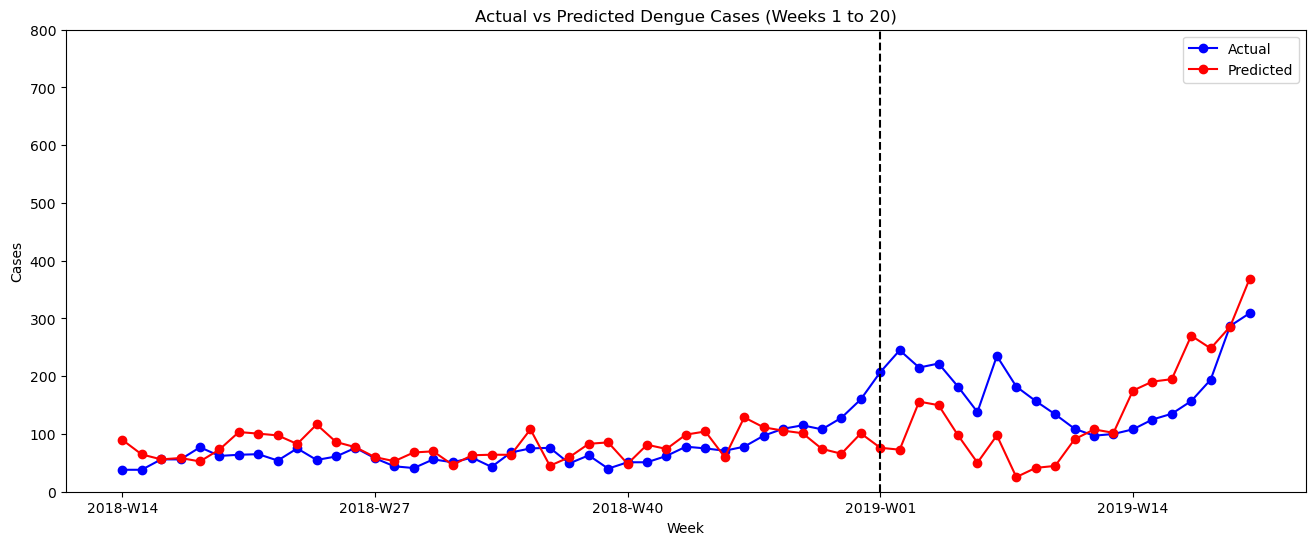

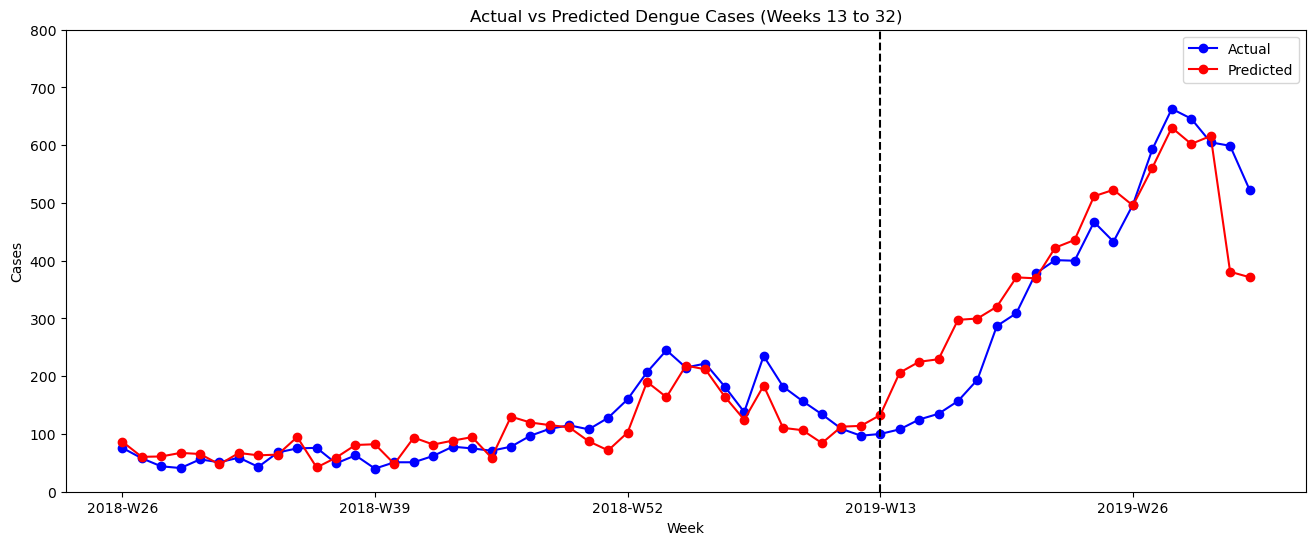

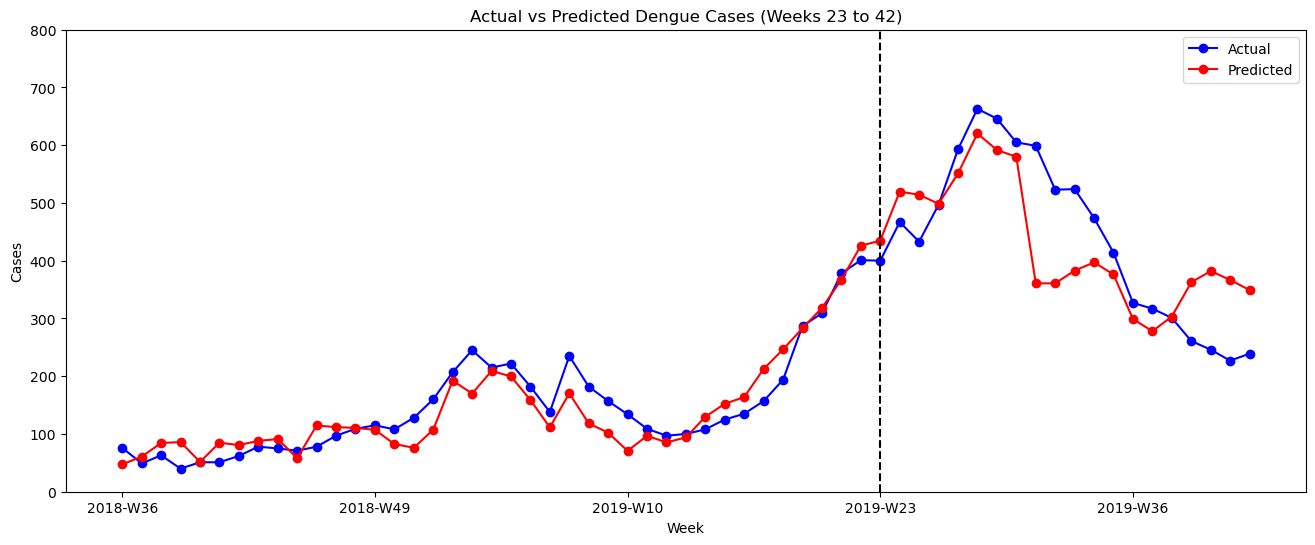

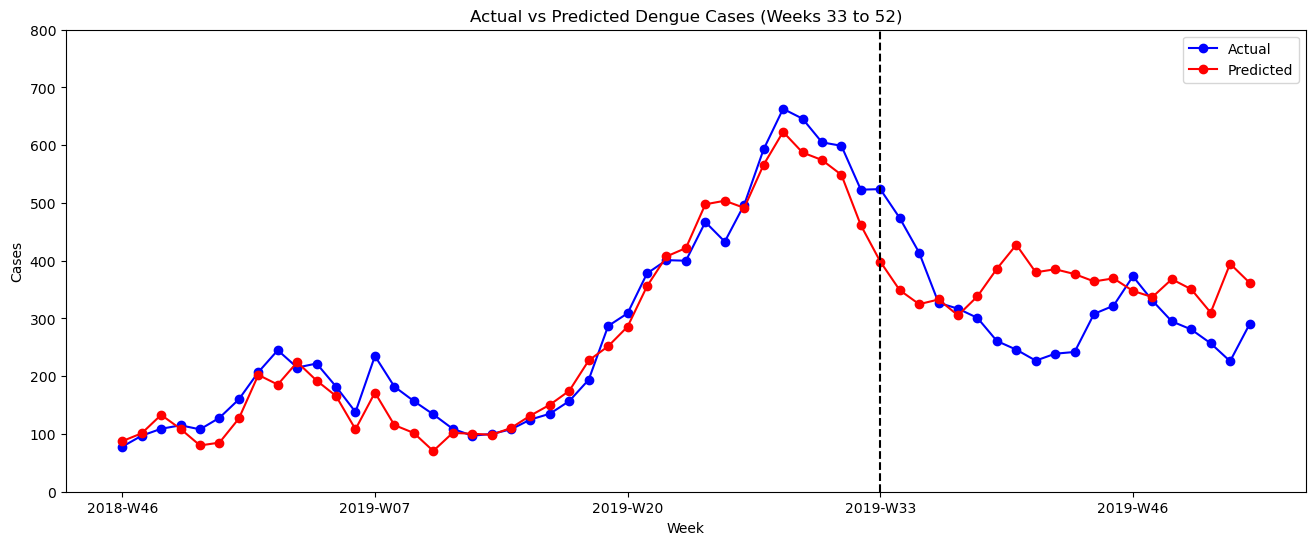

In [80]:
# Plot the graph of real vs predicted values for different periods.

for model, period in zip([catboost_w01_w20, catboost_w13_w32, catboost_w23_w42, catboost_w33_w52],
                         ['Weeks 1 to 20', 'Weeks 13 to 32', 'Weeks 23 to 42', 'Weeks 33 to 52']):
    plot_multiple_lines(
        df=model.df_real_pred.iloc[-59:, :],
        line=model.df_real_pred.iloc[-60:-21, :].shape[0],
        title=f'Actual vs Predicted Dengue Cases ({period})',
        **params_real_pred_plot
    )